In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import timedelta
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')

df = pd.read_csv('./Datasets/cleaned_df.csv', index_col='date')

In [2]:
df.index = pd.to_datetime(df.index)

In [5]:
len(df['county_code'].unique())

54

Let's look at mean AQI by county:

In [3]:
aqi_county = df.groupby('county_name').mean()
aqi_county.sort_values('aqi', ascending=False).head(20)

county_code        aqi  number_of_sites_reporting
county_name                                                      
San Bernardino         71.0  96.003051                  13.321051
Riverside              65.0  95.258214                  15.007635
Kern                   29.0  89.184826                   9.743559
Los Angeles            37.0  88.113571                  15.768333
Tulare                107.0  85.825862                   3.845341
Fresno                 19.0  83.543929                   7.980424
Kings                  31.0  75.237159                   2.630264
Inyo                   27.0  69.379166                  13.240270
San Diego              73.0  69.166903                  10.575414
Mono                   51.0  67.701119                   2.654680
Stanislaus             99.0  66.445351                   1.980890
Madera                 39.0  65.597446                   2.055582
Imperial               25.0  65.455387                   4.581395
Merced                 47.0  62.153702                   1.291287
Sacramento             67.0  61.913023                   7.861262
Placer                 61.0  59.616053                   4.155597
San Joaquin            77.0  59.321370                   2.855512
Orange                 59.0  58.944762                   4.239048
Mariposa               43.0  58.911758                   2.617226
Butte                   7.0  58.419286                   3.693926

The top 4 counties are connected by borders and are near Los Angeles that has one of the highest polluted air in the country. The number 5 spot belongs to Tulare county that has Sequoia National Forest which was subject to forest fires. 

No handles with labels found to put in legend.


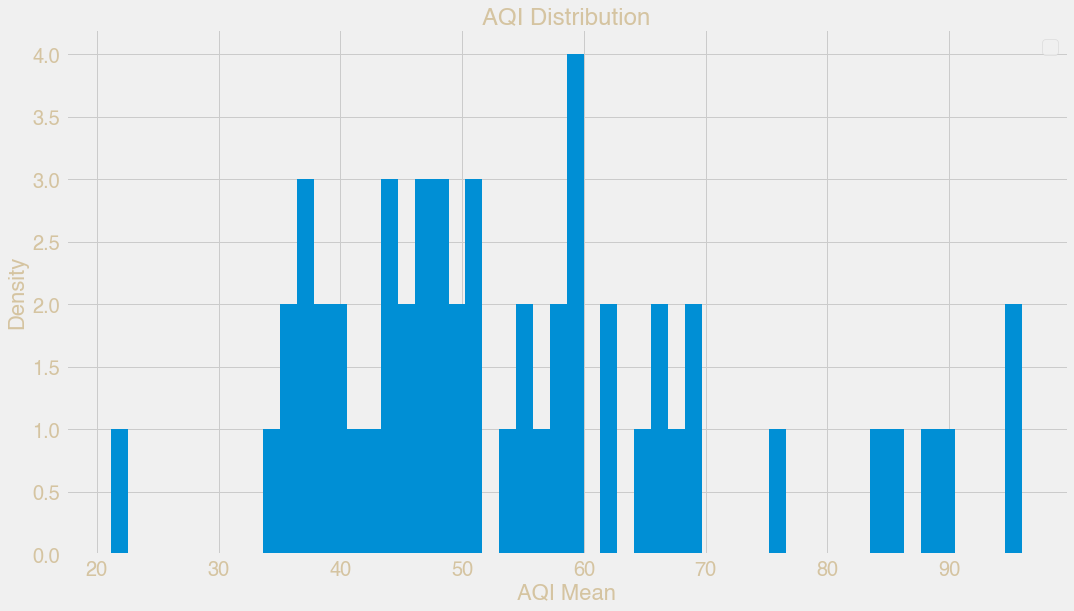

In [17]:
plt.figure(figsize=(16,9))
plt.hist(aqi_county['aqi'], bins=54) #bins equal to exact count of counties

# Decoration
plt.title('AQI Distribution', fontsize=24)
plt.xlabel("AQI Mean", fontsize=22)
plt.ylabel('Density', fontsize=22)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show();

In [12]:
def_param = df.groupby('defining_parameter').mean()
def_param = def_param.reset_index()

In [13]:
def_param

defining_parameter  county_code        aqi  number_of_sites_reporting
0                 CO    51.507463  25.164179                   3.626866
1                NO2    57.858324  41.573319                   5.176957
2              Ozone    58.499788  53.886557                   4.279999
3               PM10    47.809114  73.795398                   5.031399
4              PM2.5    58.042919  56.720513                   4.194530
5                SO2    52.862069  66.586207                   9.068966

No handles with labels found to put in legend.


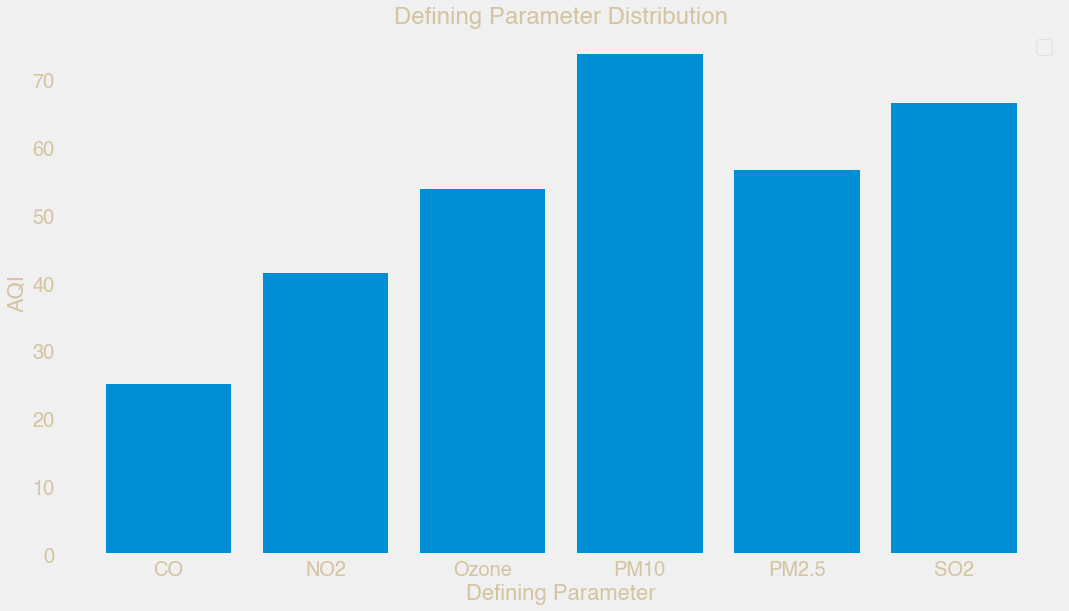

In [16]:
plt.figure(figsize=(16,9))
plt.bar(x=def_param['defining_parameter'], height=def_param['aqi'])
plt.grid(False)
# Decoration
plt.title('Defining Parameter Distribution', fontsize=24)
plt.xlabel("Defining Parameter", fontsize=22)
plt.ylabel('AQI', fontsize=22)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show();

In [12]:
df.index = pd.to_datetime(df.index)

In [19]:
df_daily = df.resample('D').mean()

In [20]:
def auto_corr(lag):
    ac = df_daily['aqi'].autocorr(lag=lag)
    print(f'Autocorellation for {lag} day(s) is: {ac}')

In [21]:
print(auto_corr(1), auto_corr(2), auto_corr(7), auto_corr(30), auto_corr(365))

Autocorellation for 1 day(s) is: 0.6405783382599282
Autocorellation for 2 day(s) is: 0.47254052609570435
Autocorellation for 7 day(s) is: 0.27212753344972235
Autocorellation for 30 day(s) is: 0.14650526083550477
Autocorellation for 365 day(s) is: 0.16687468620962348
None None None None None


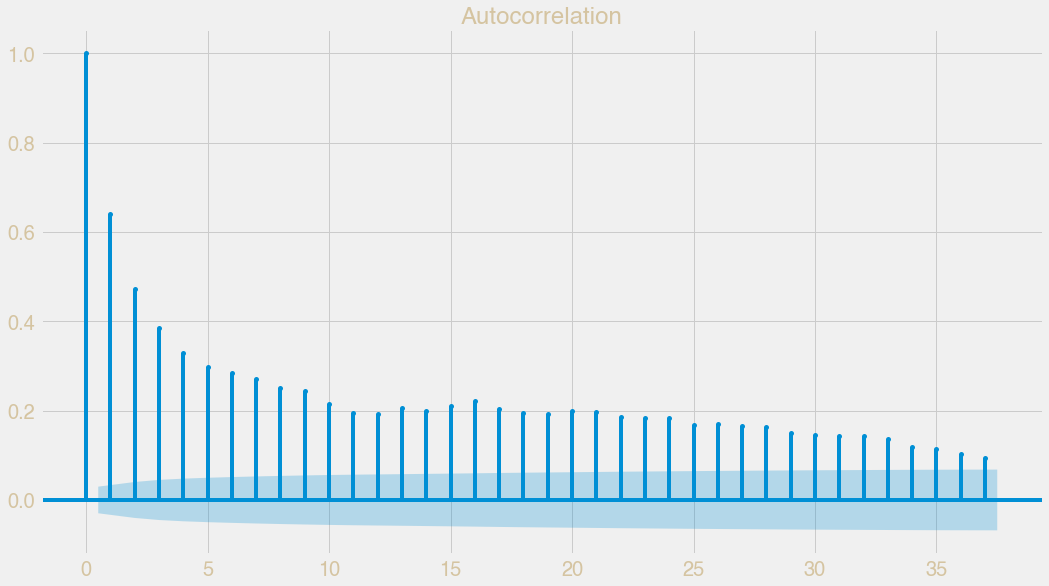

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(16,9))
plot_acf(df_daily['aqi'], ax=ax)
# Decoration
plt.title('Autocorrelation', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show();

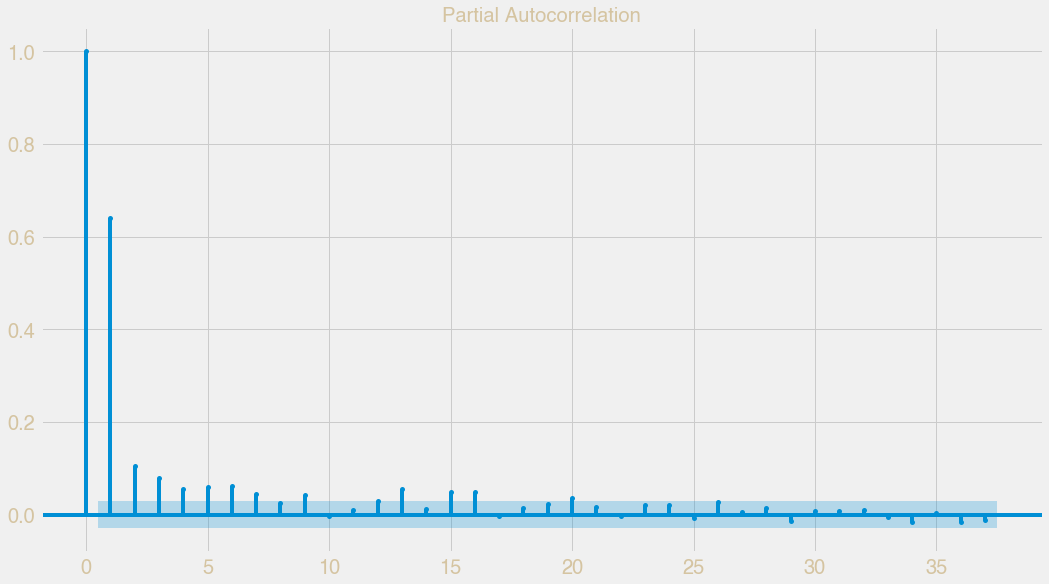

In [24]:
fig, ax = plt.subplots(figsize=(16,9))
plot_pacf(df_daily['aqi'], ax=ax)
# Decoration

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show();

<ipython-input-25-cbfa39eccc8f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,8))


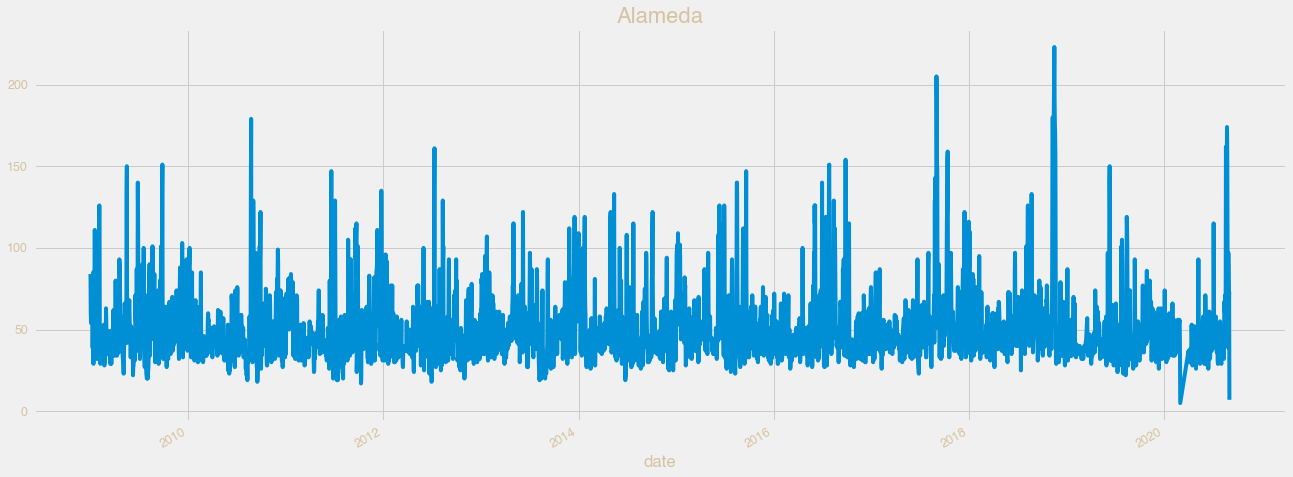

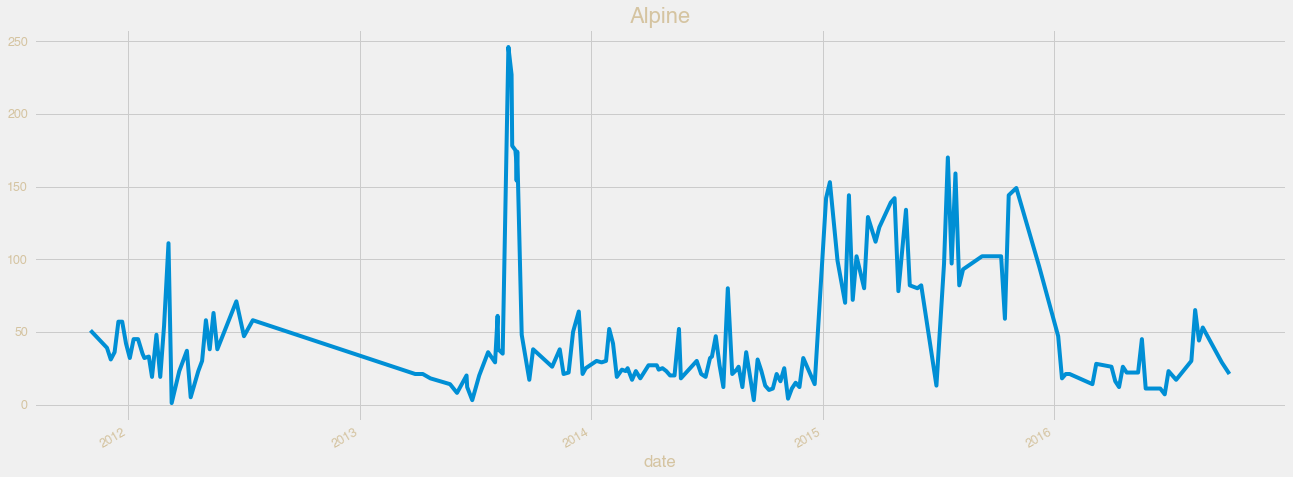

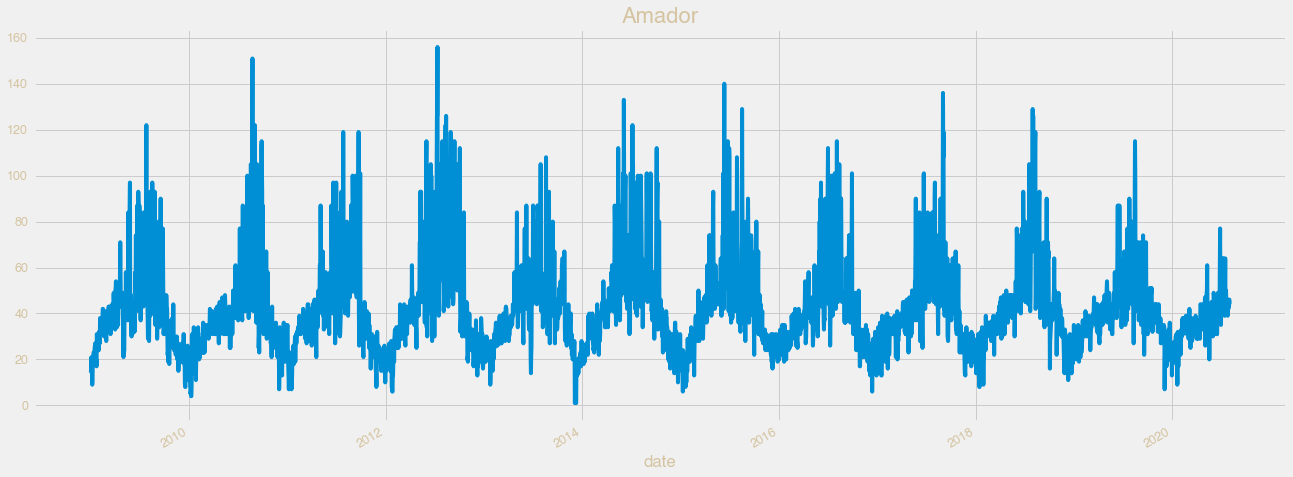

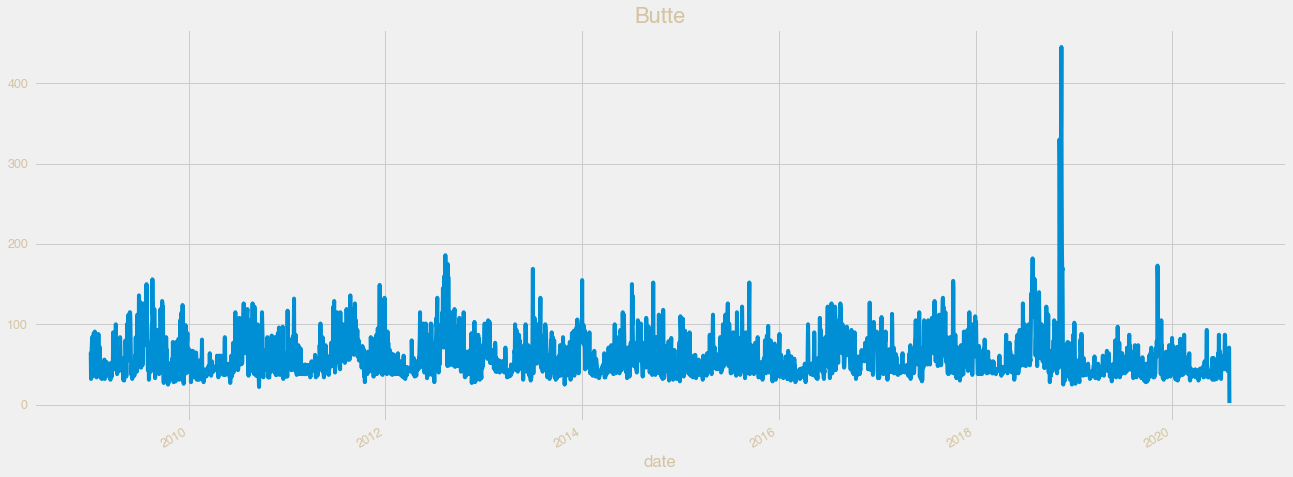

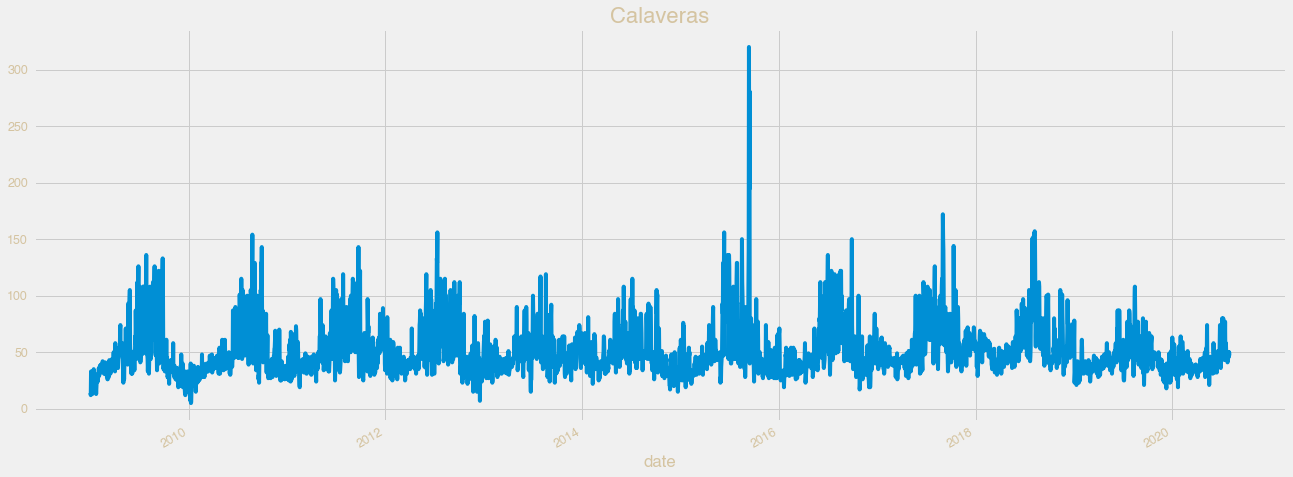

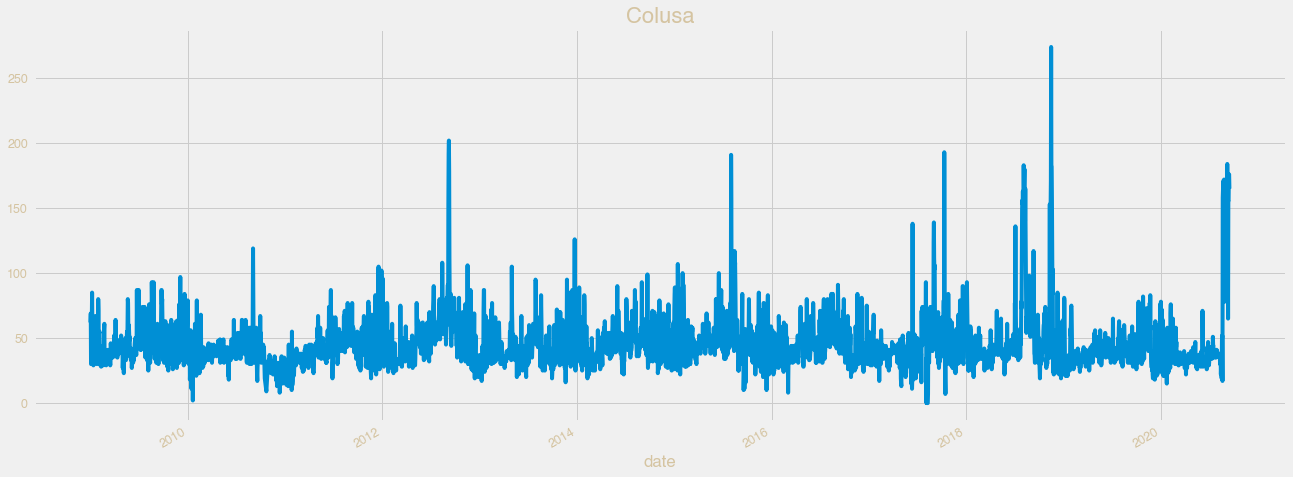

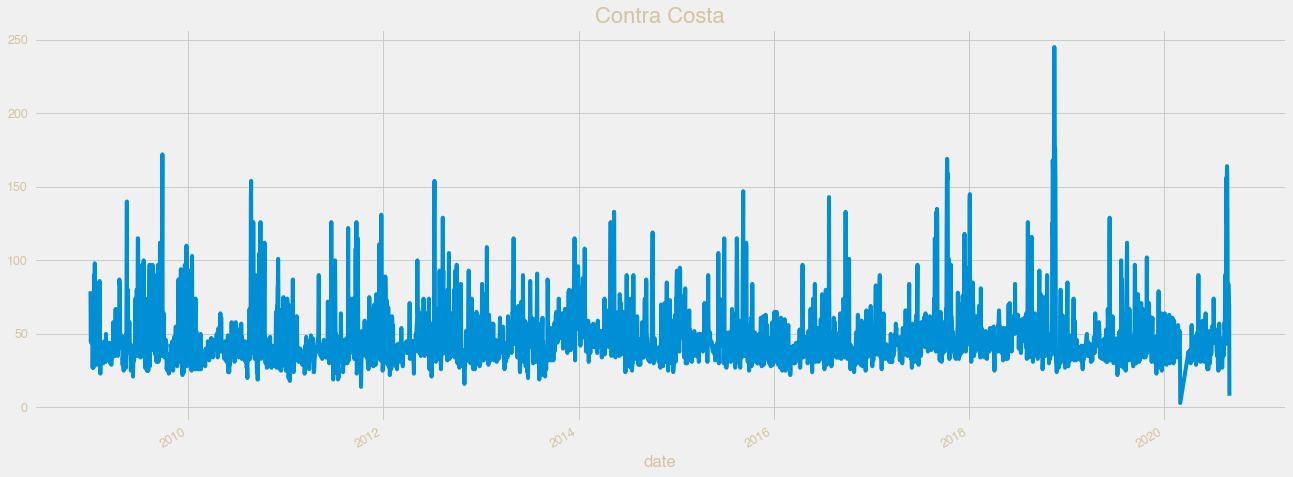

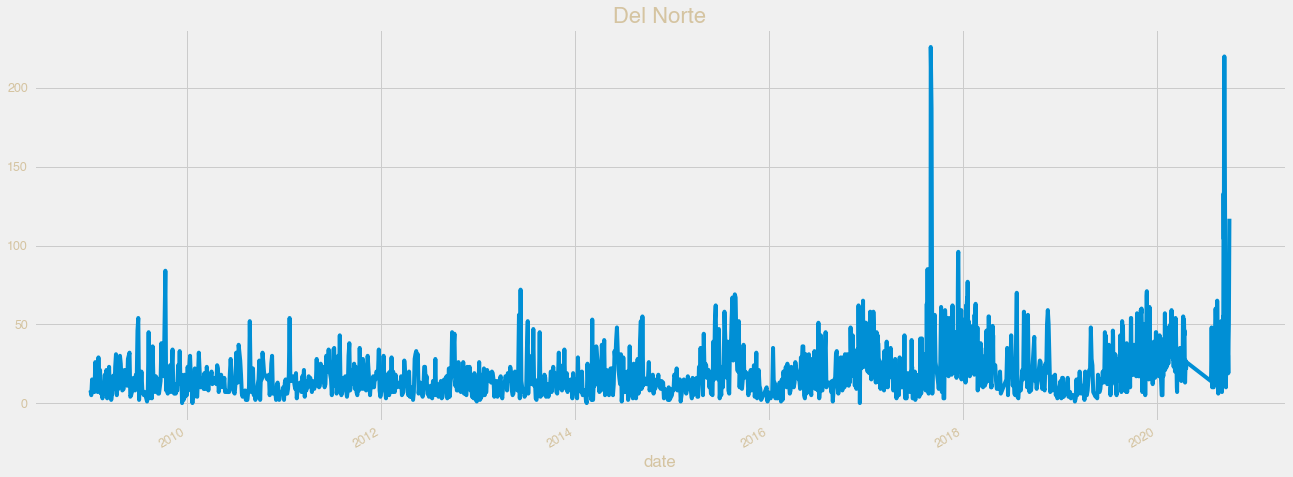

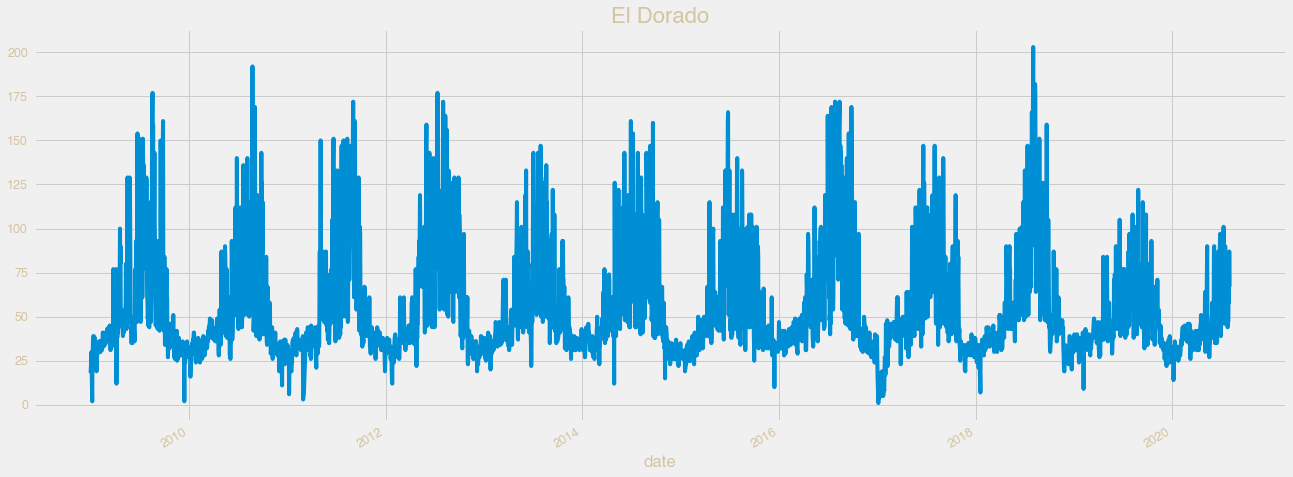

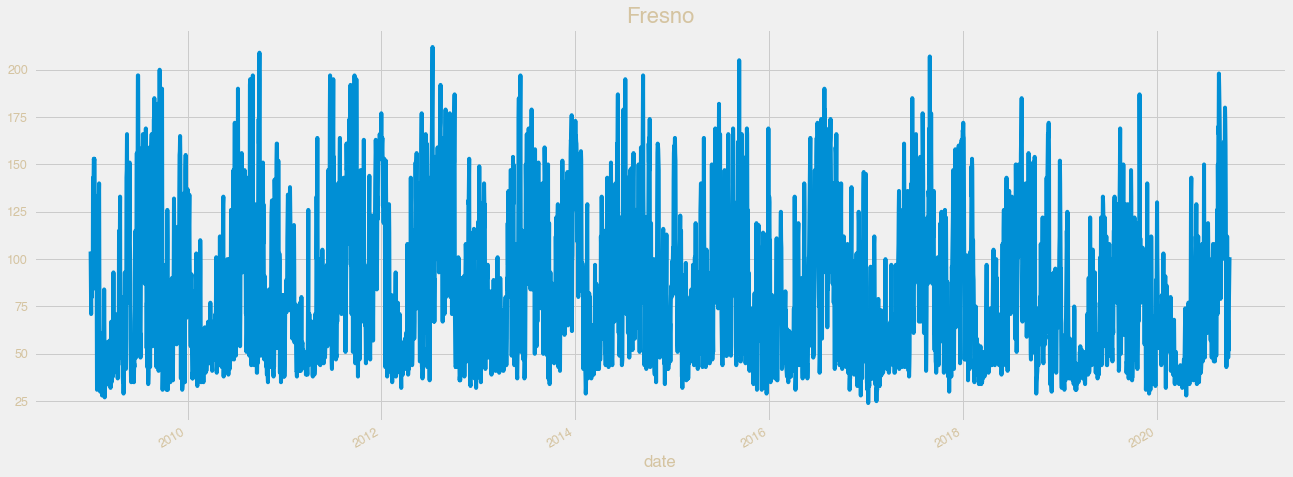

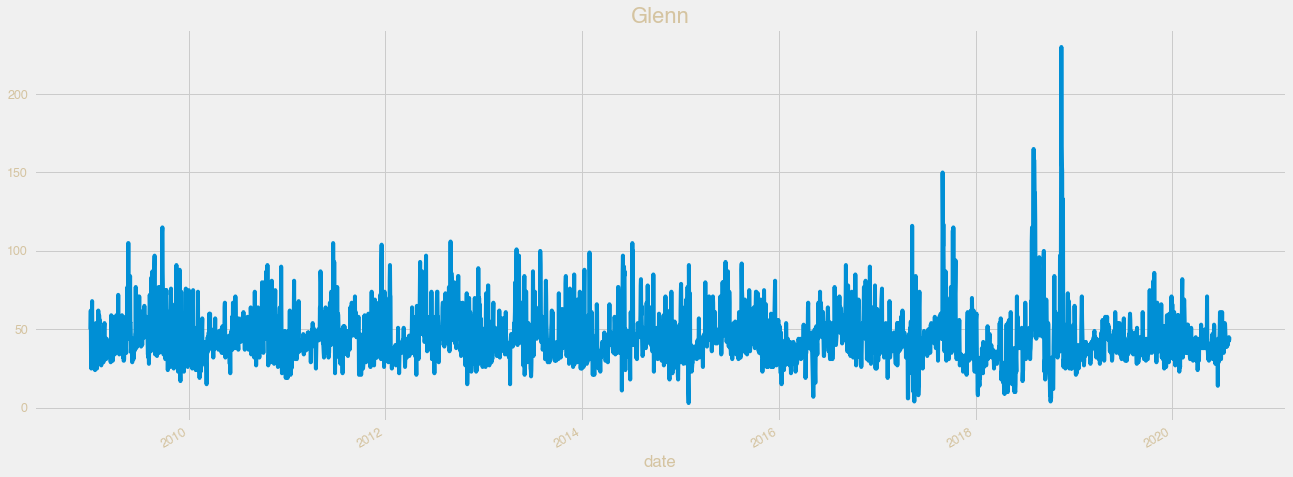

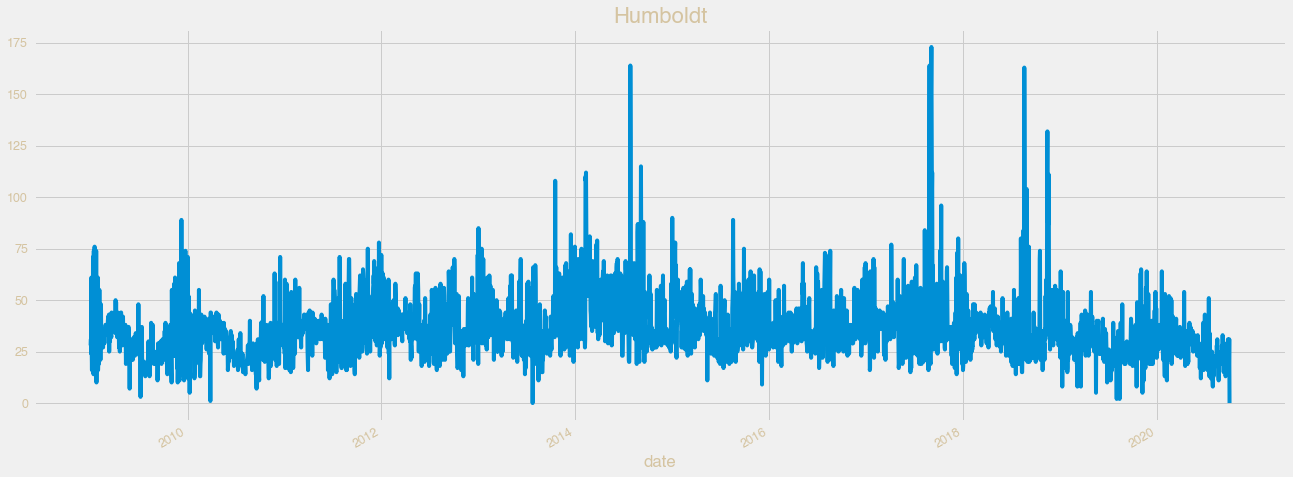

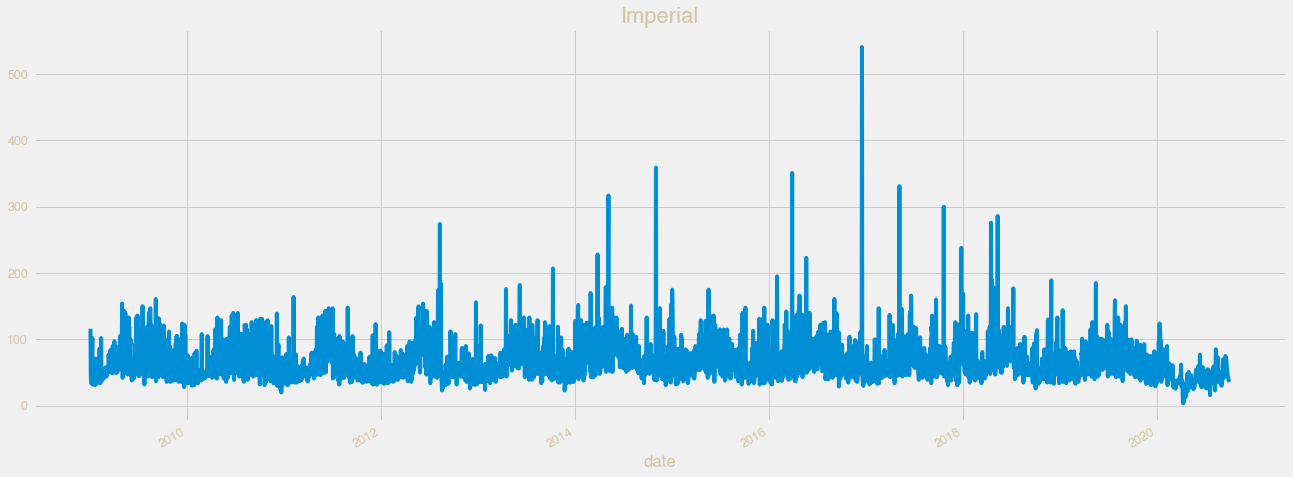

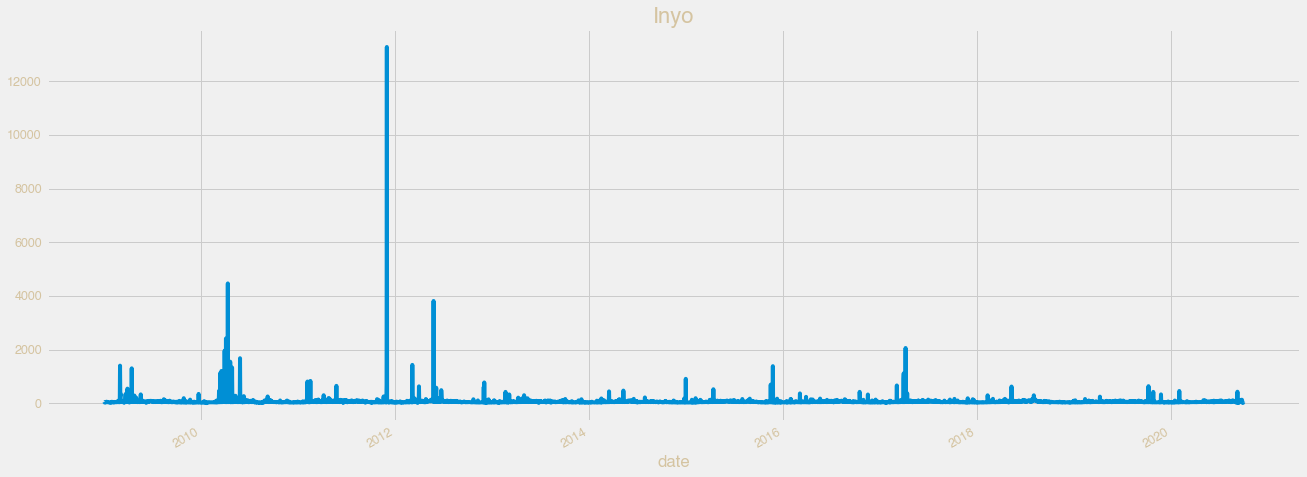

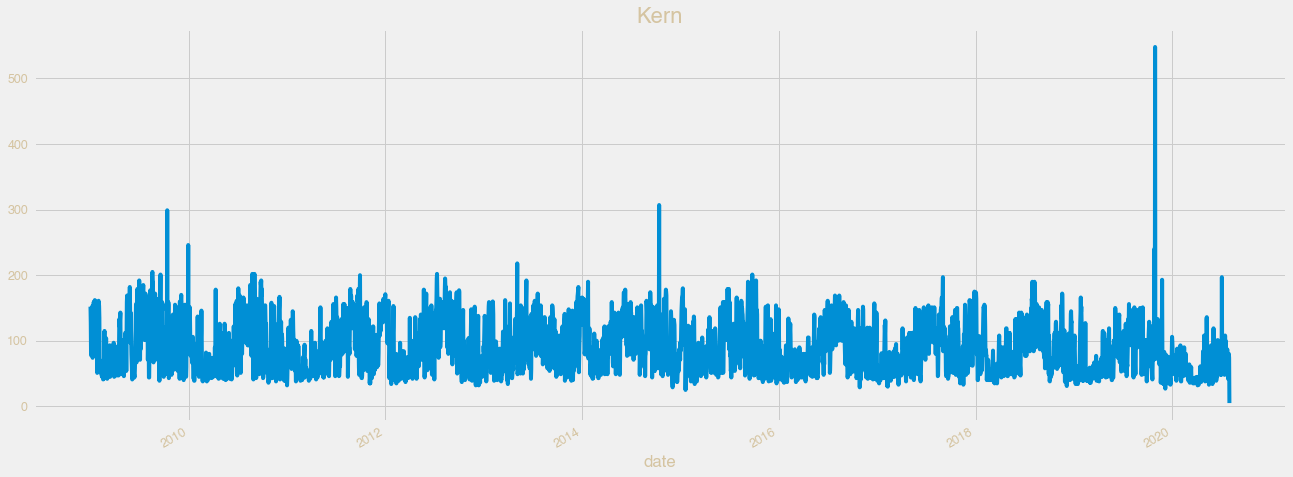

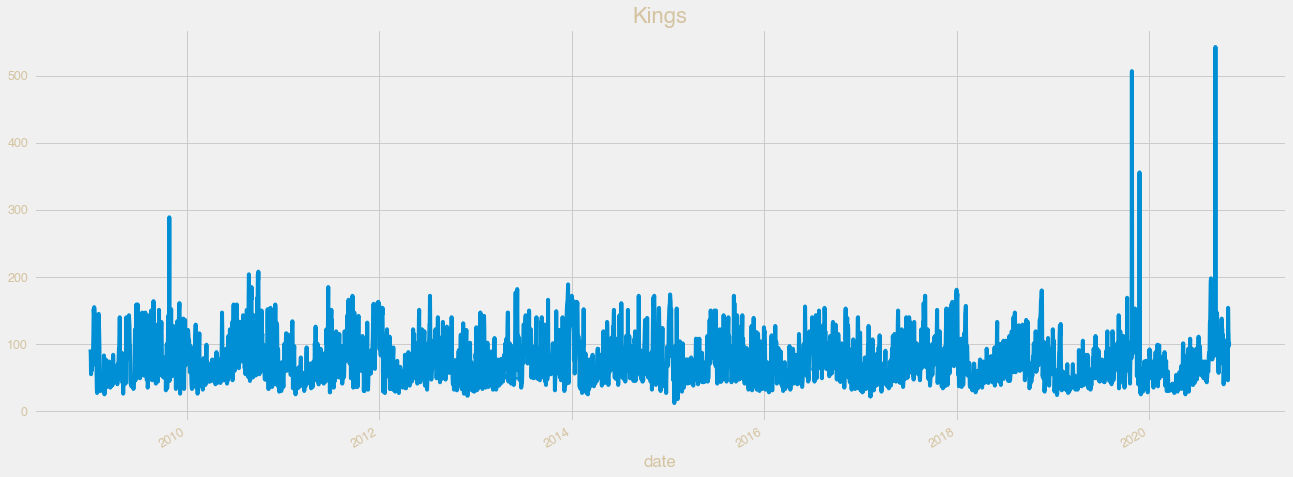

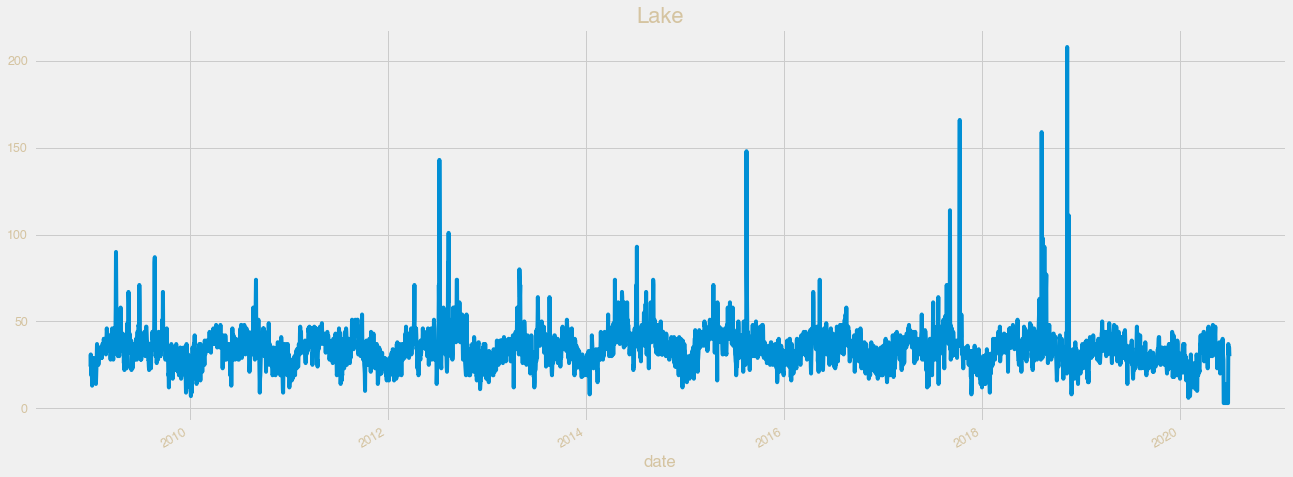

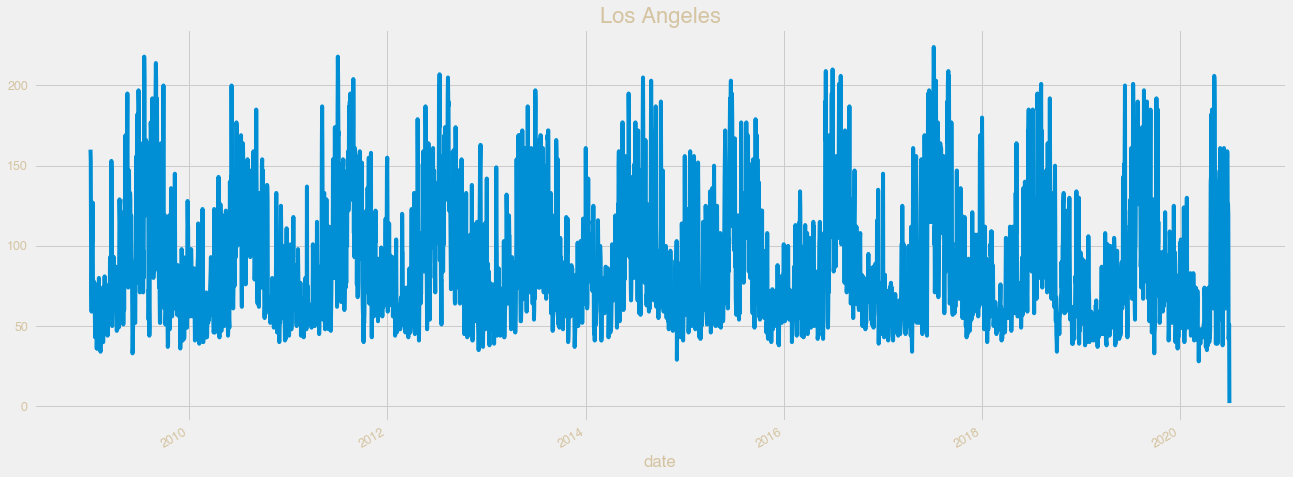

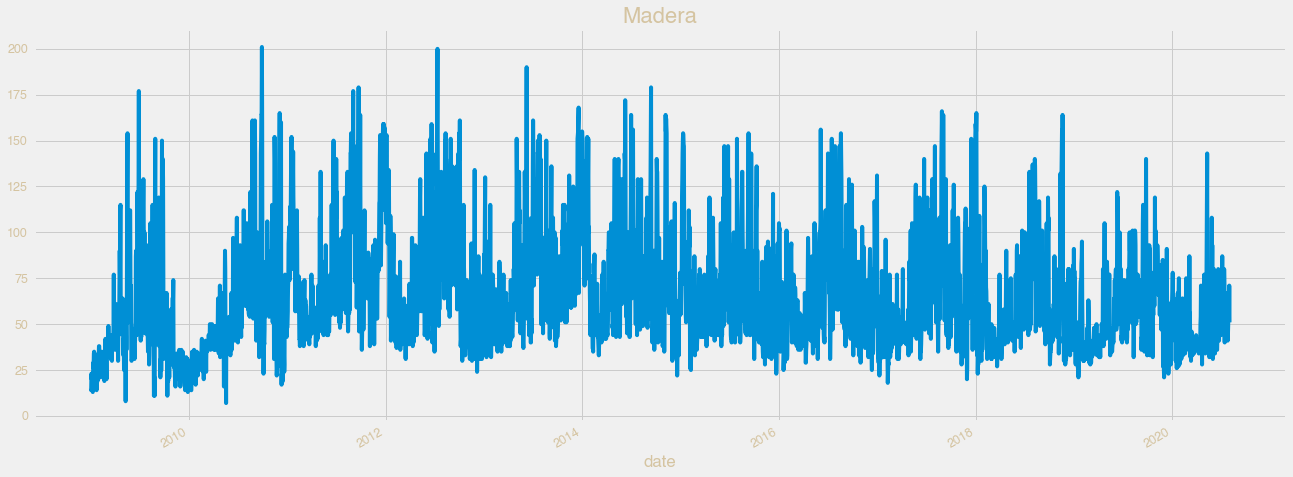

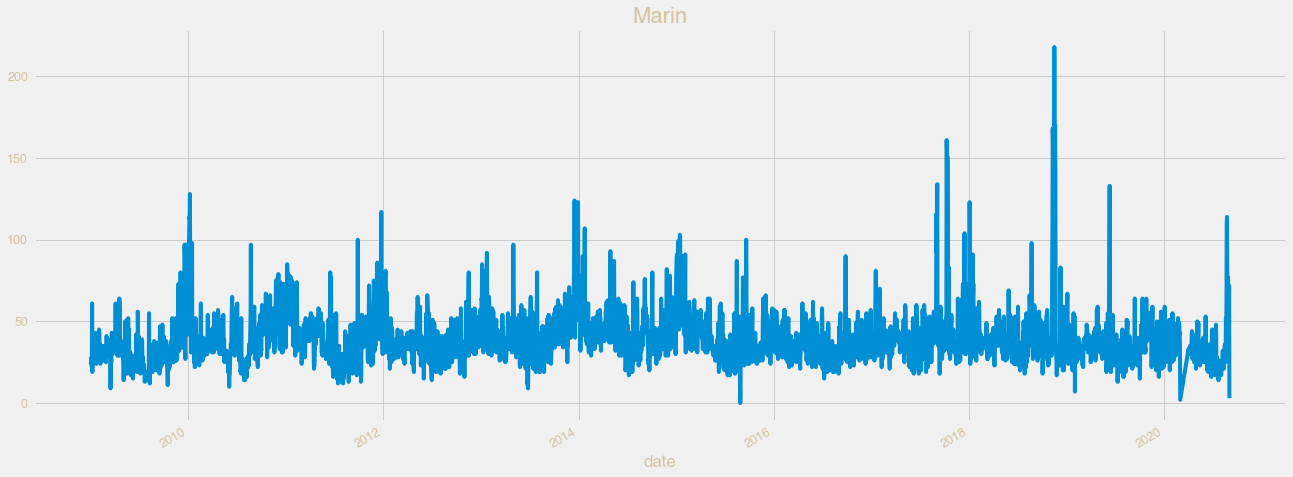

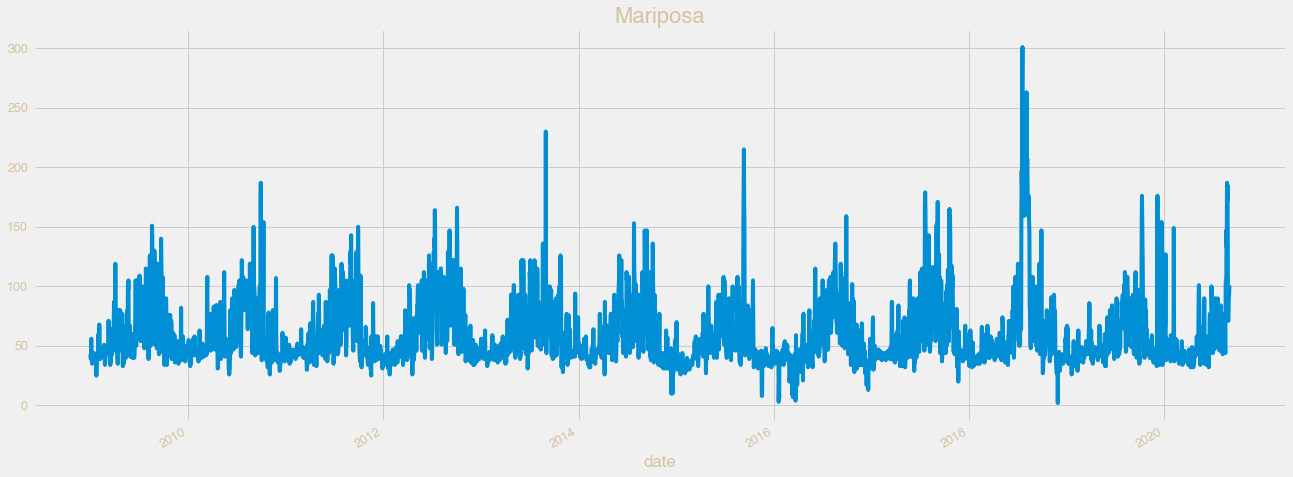

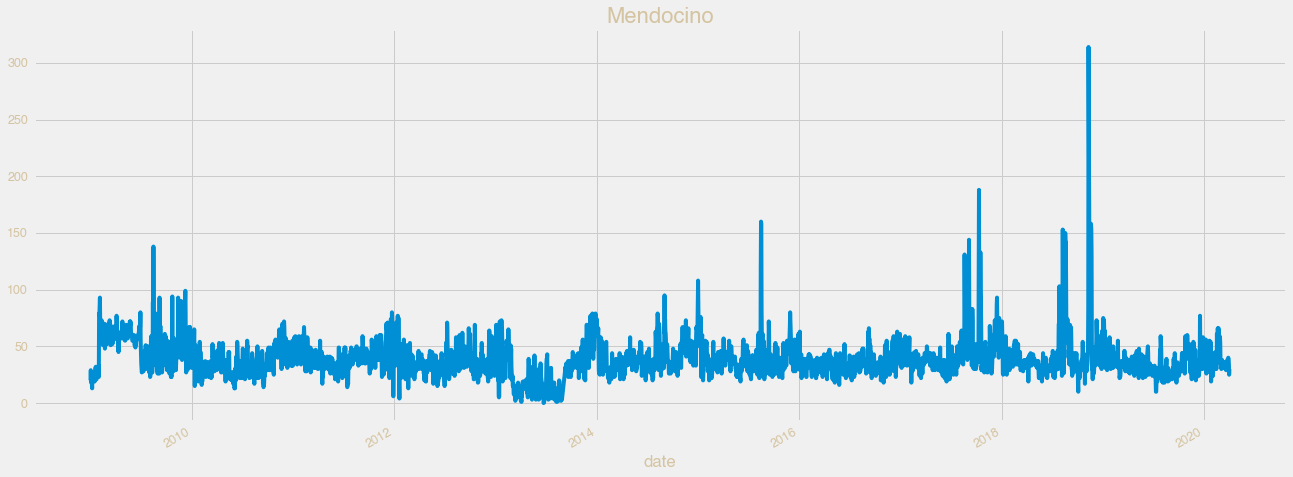

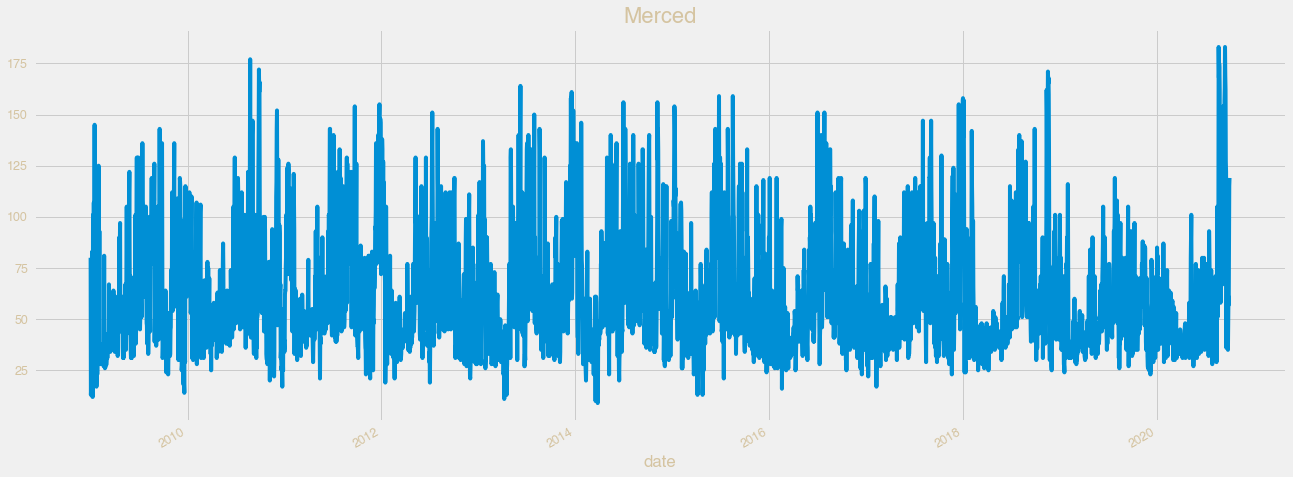

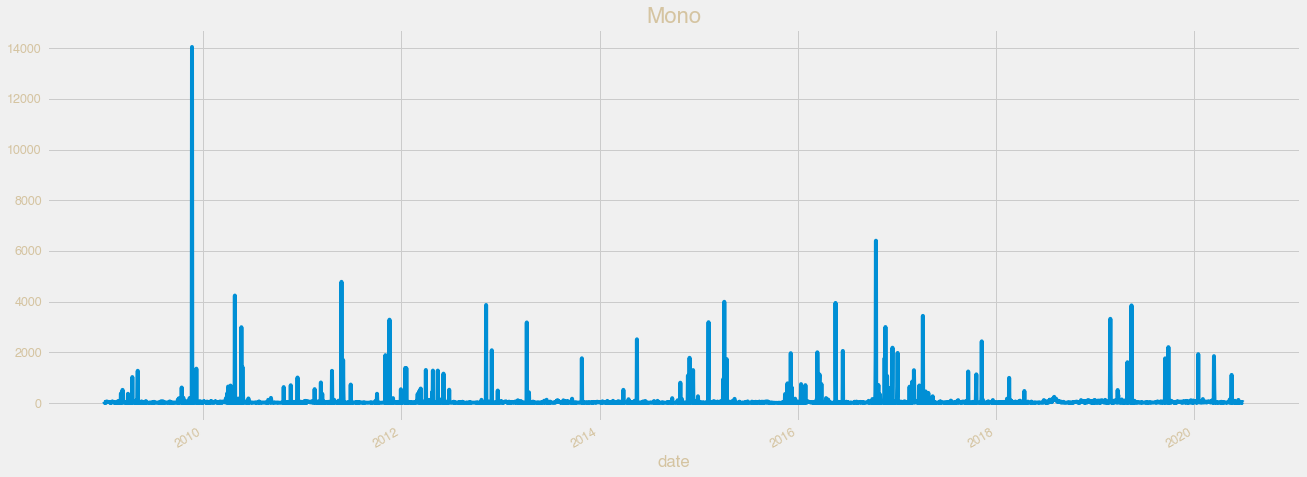

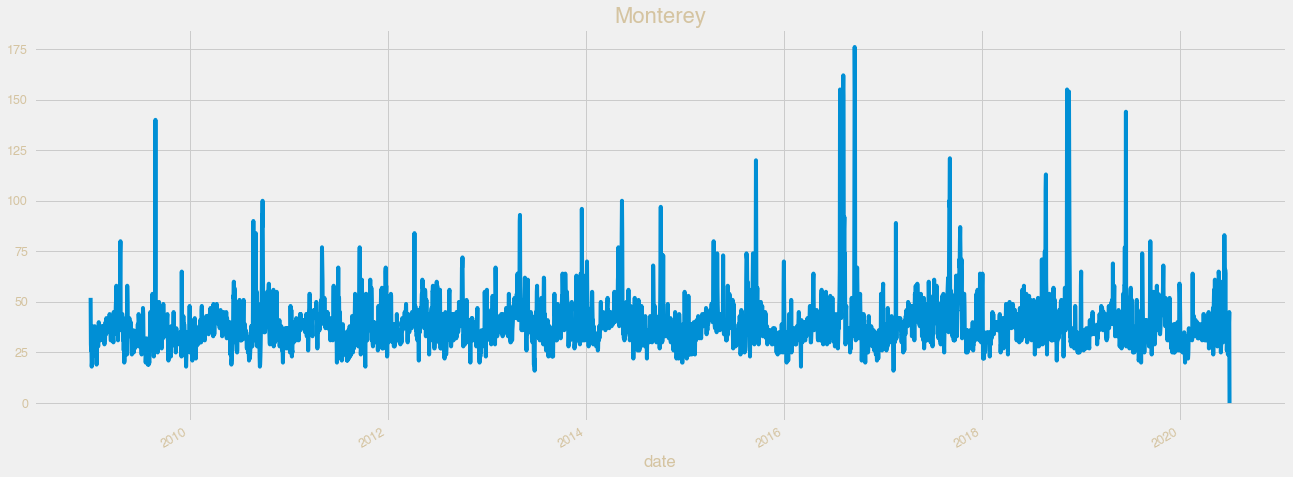

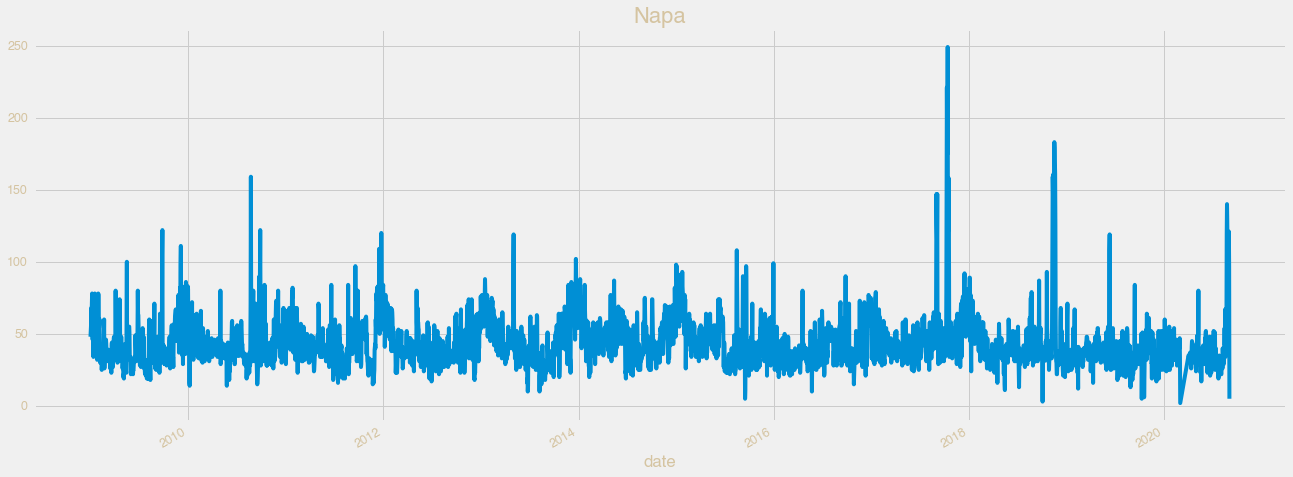

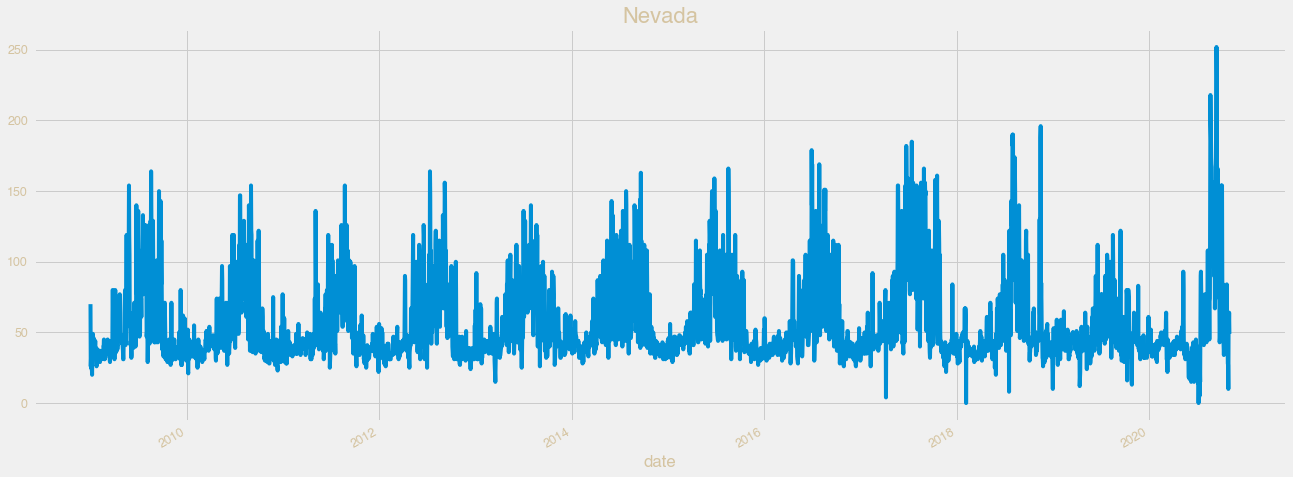

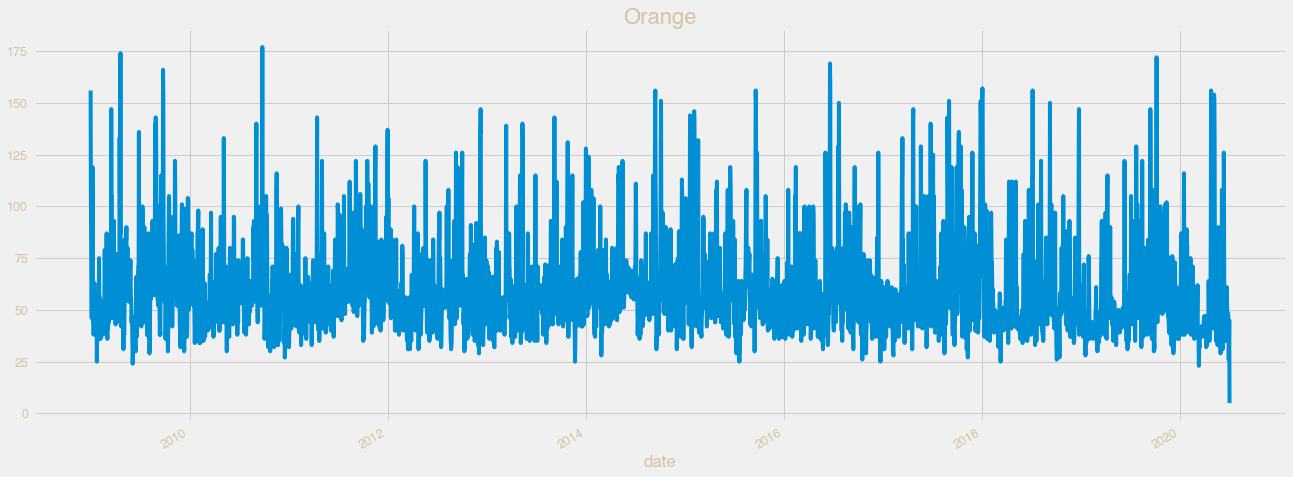

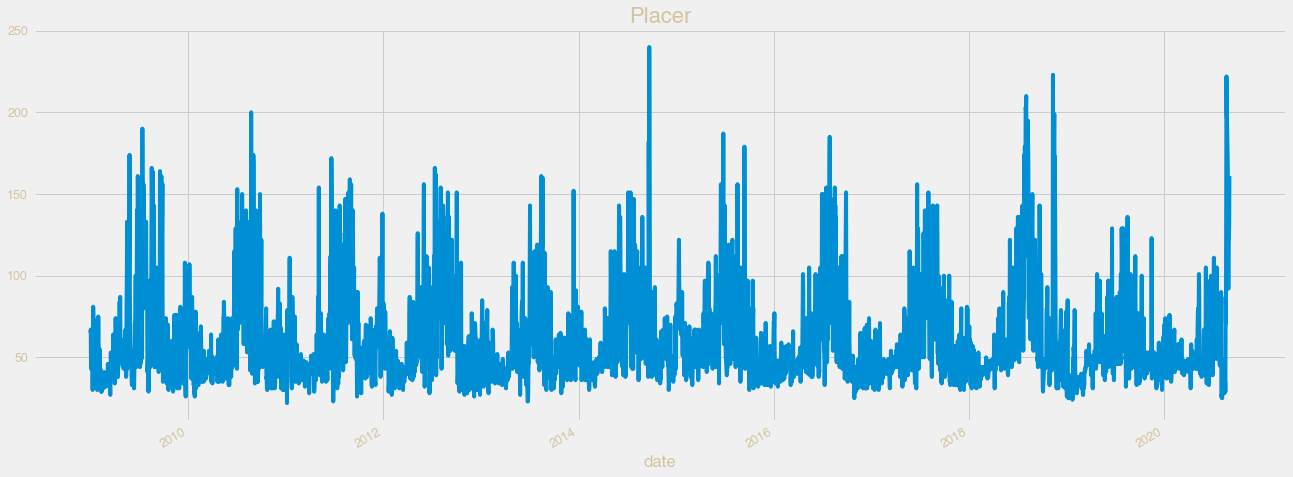

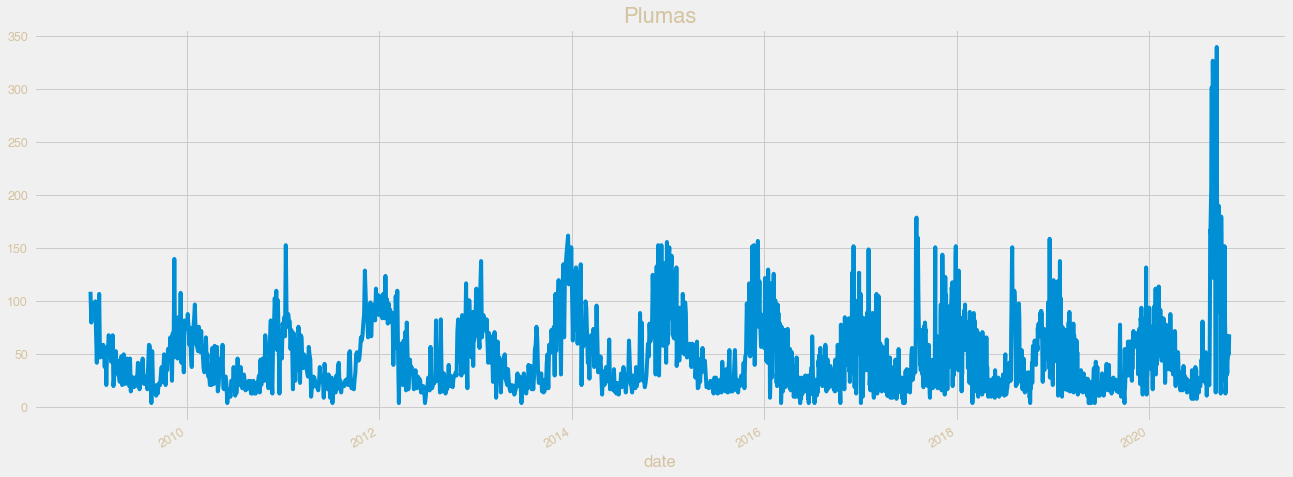

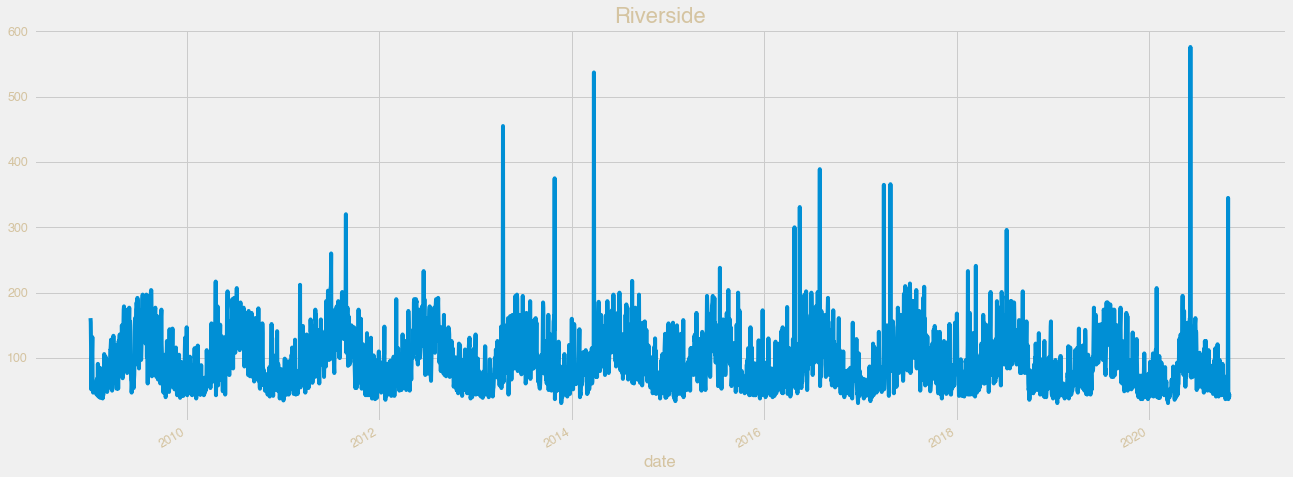

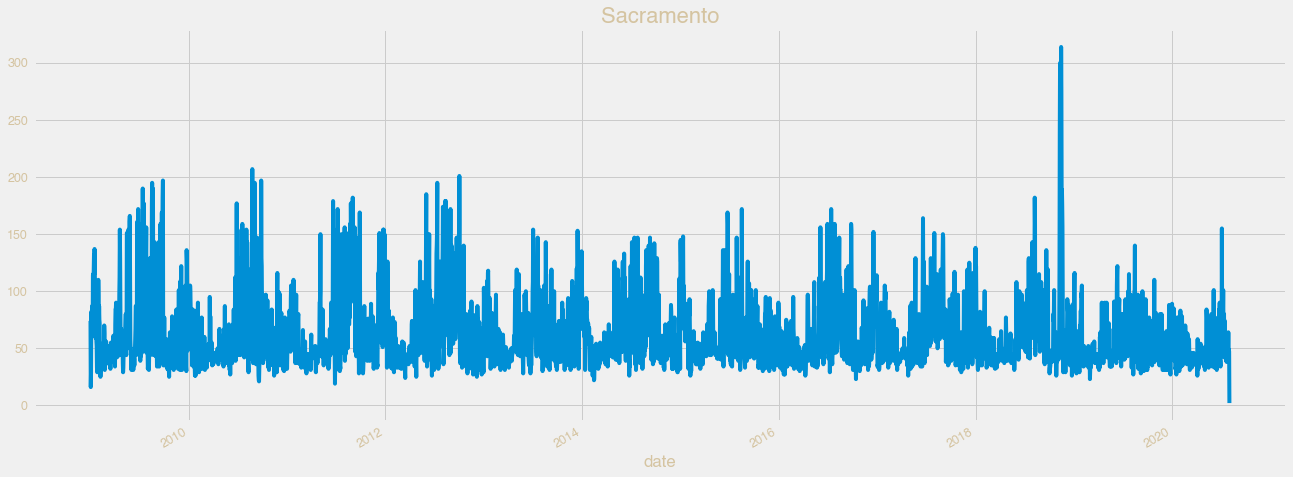

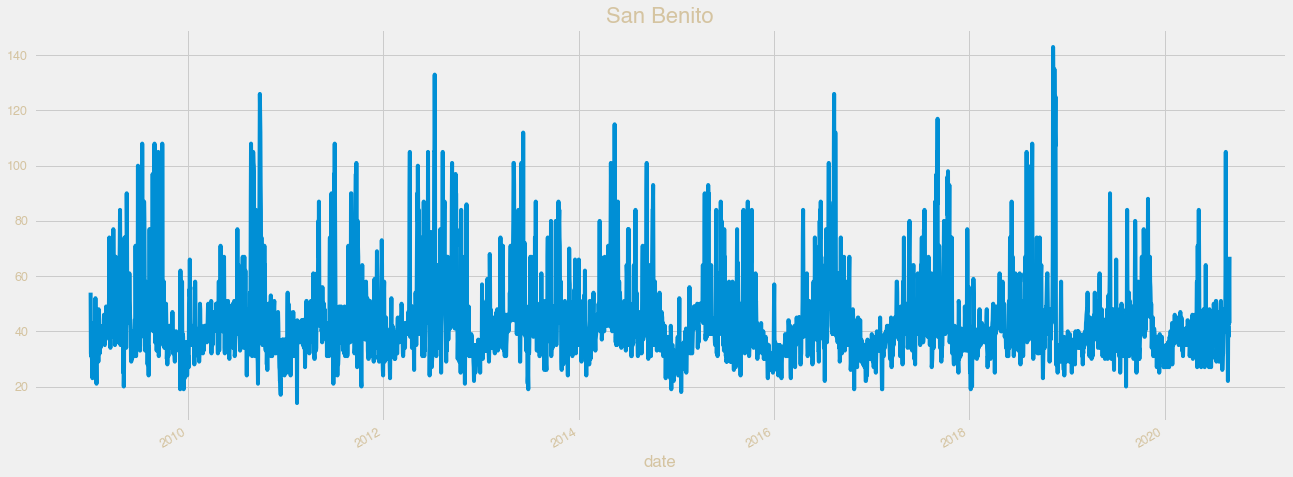

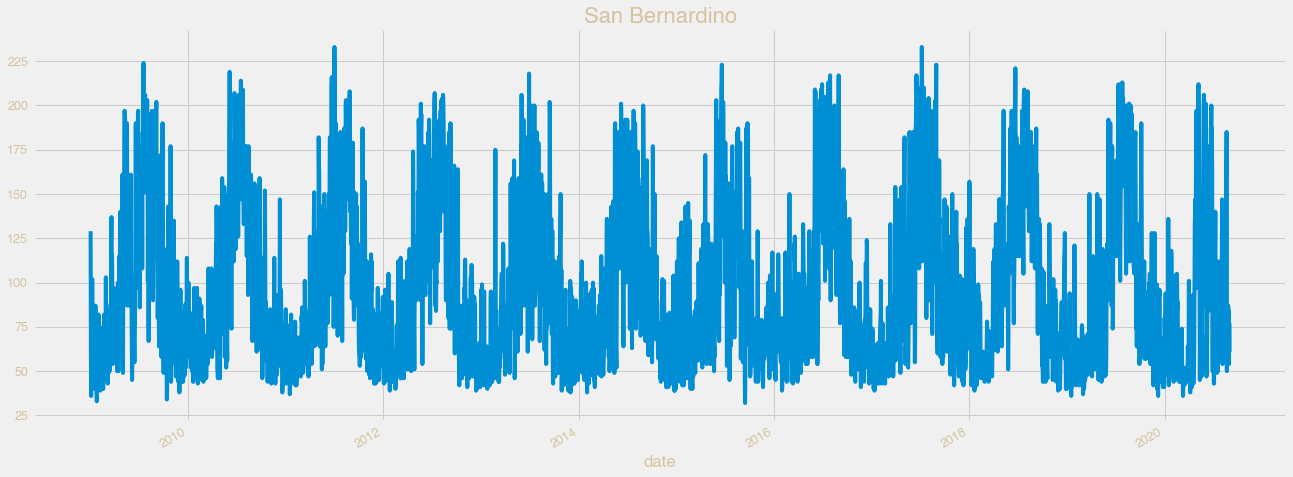

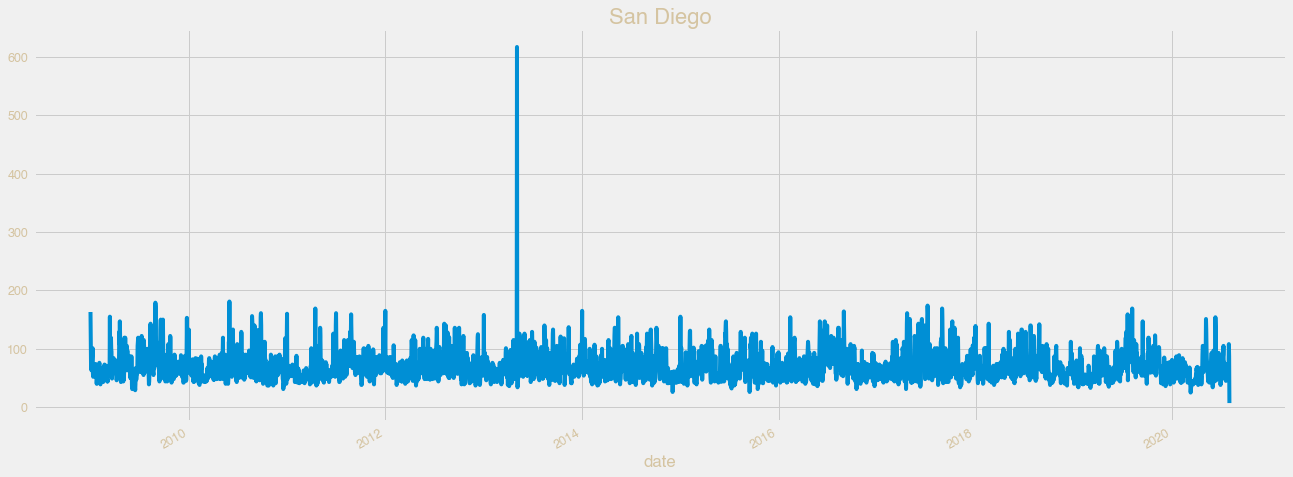

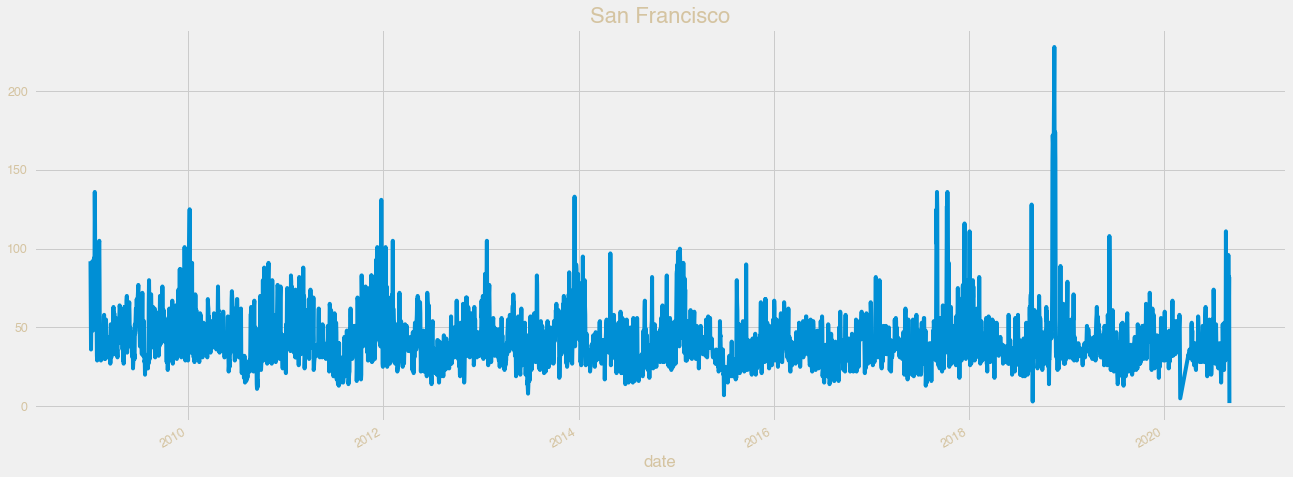

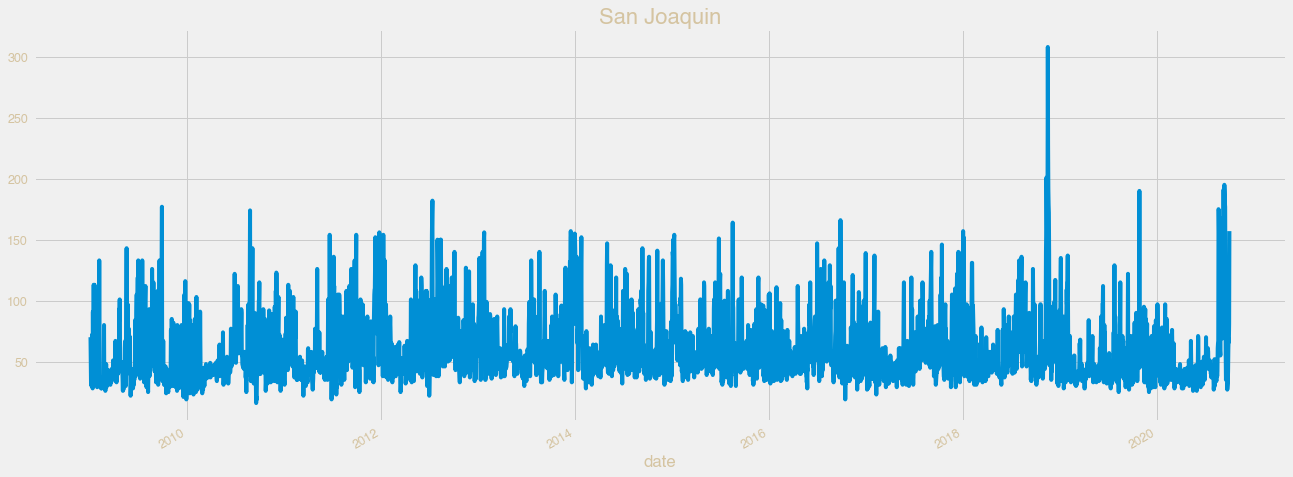

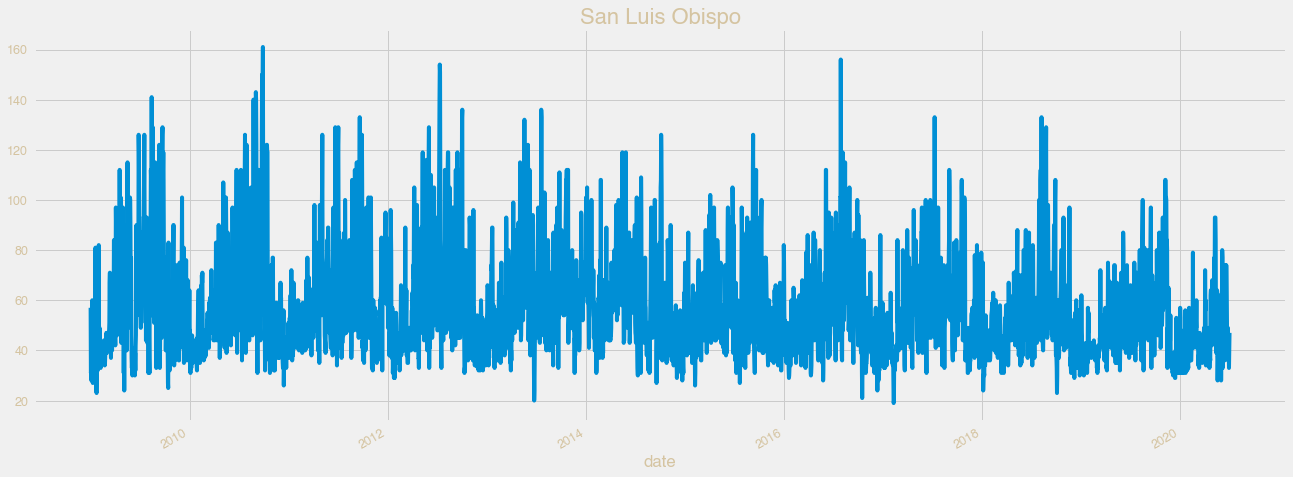

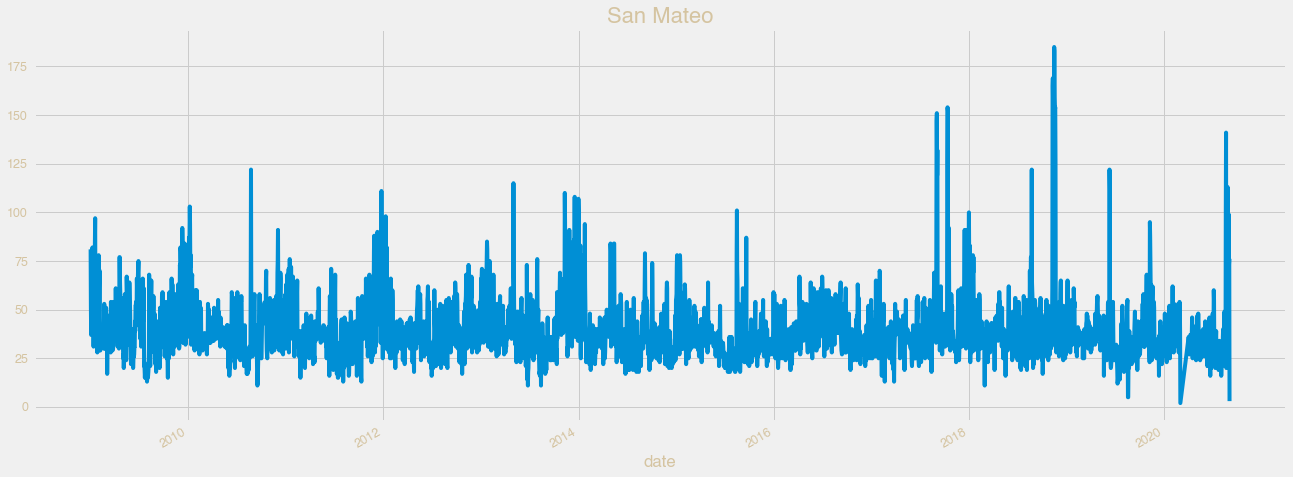

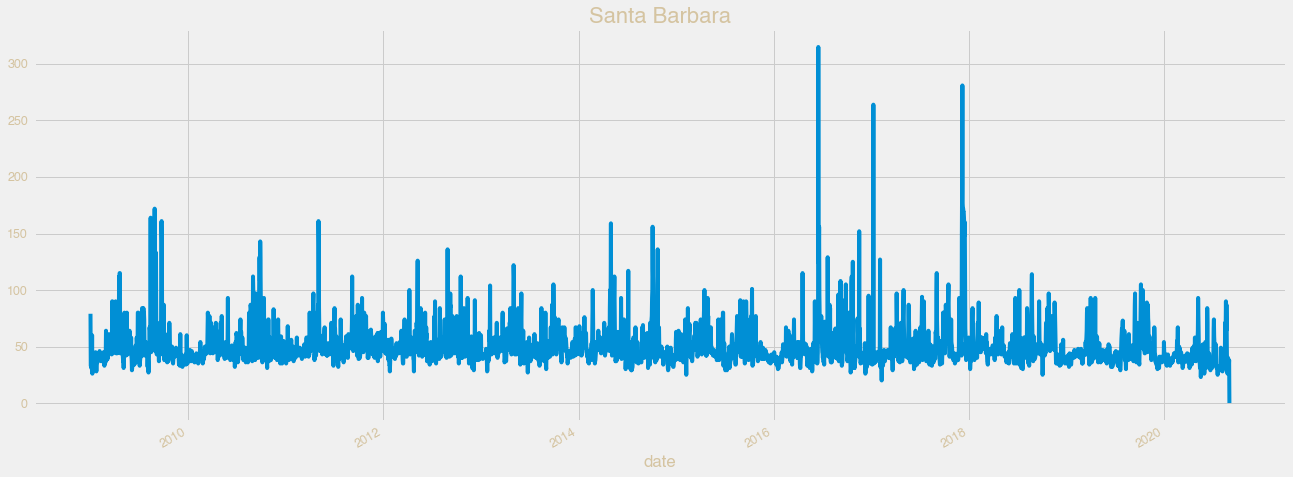

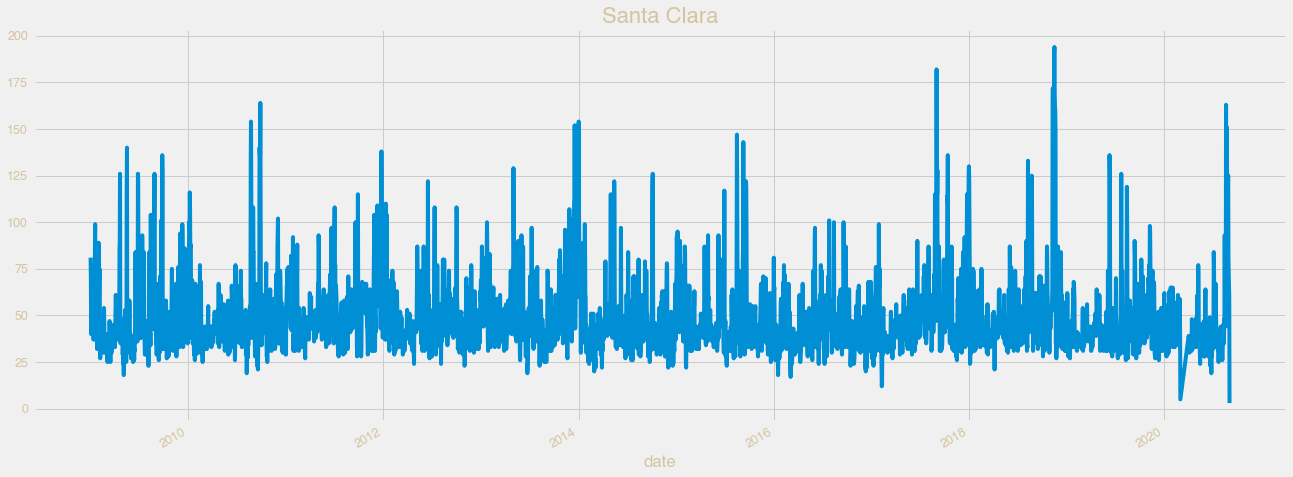

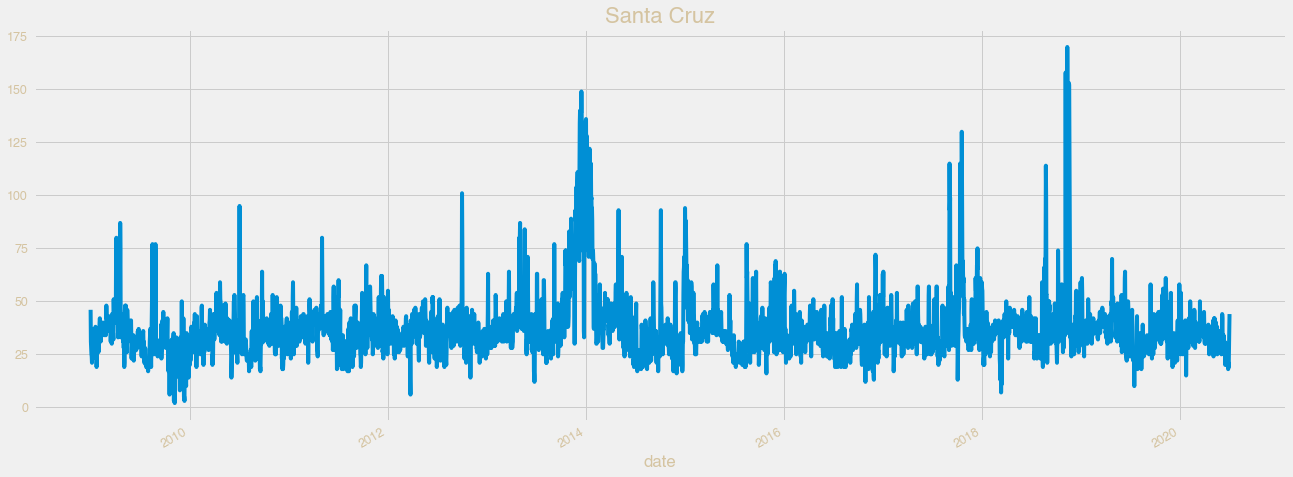

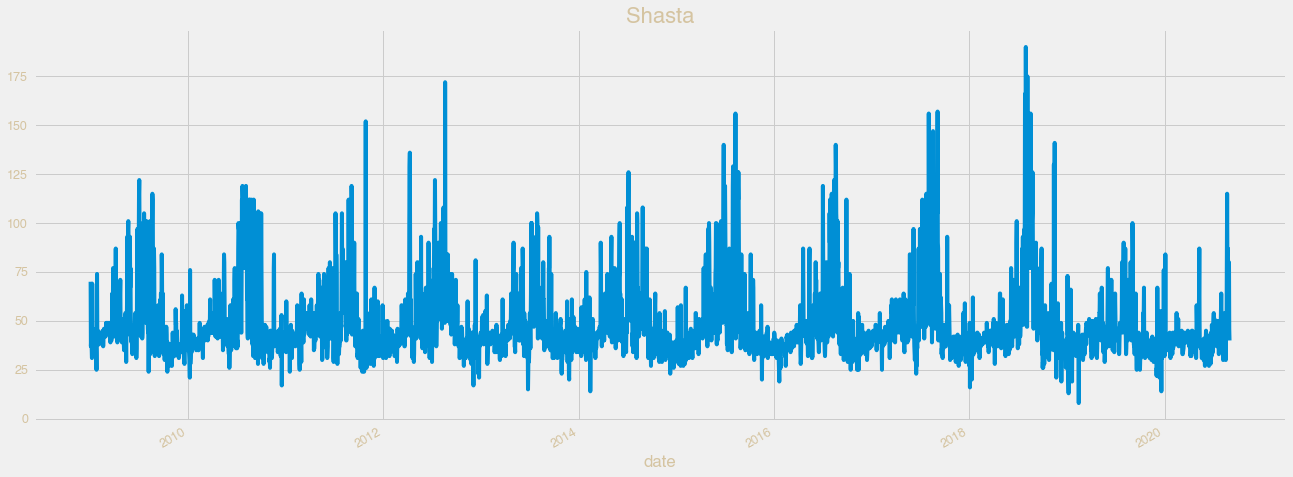

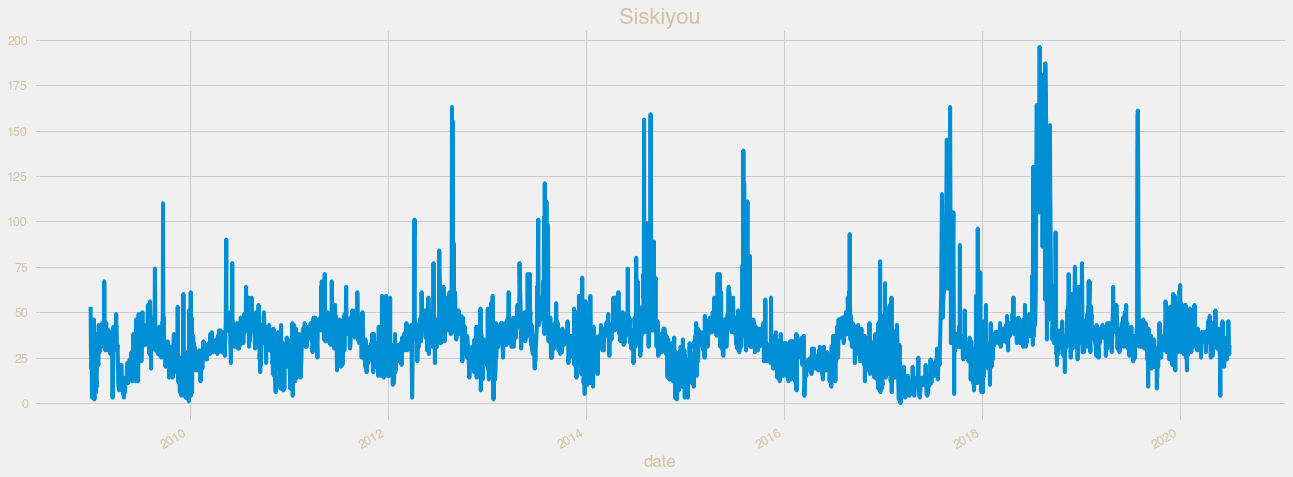

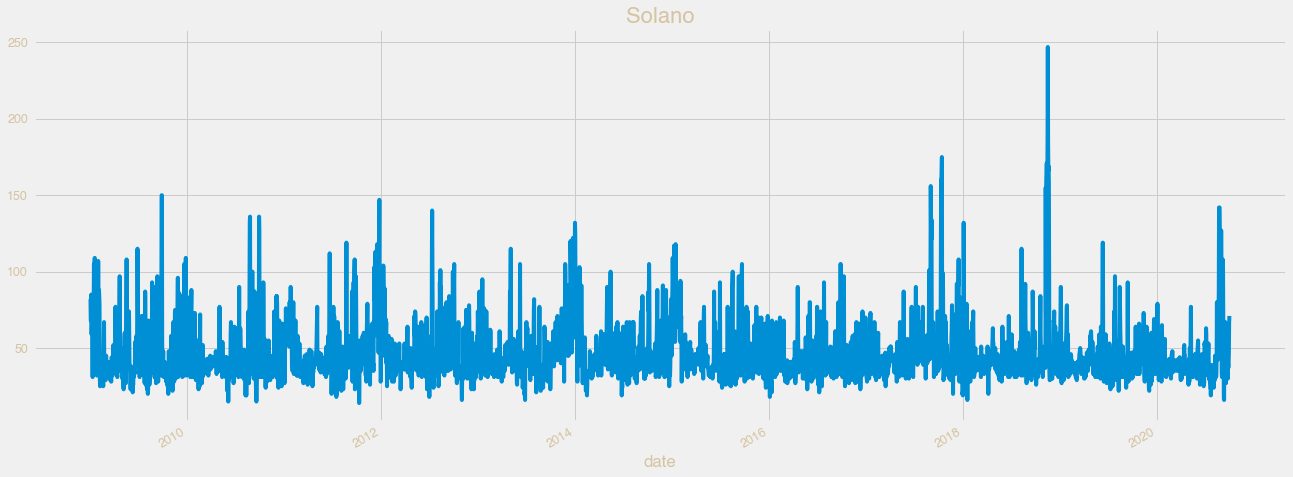

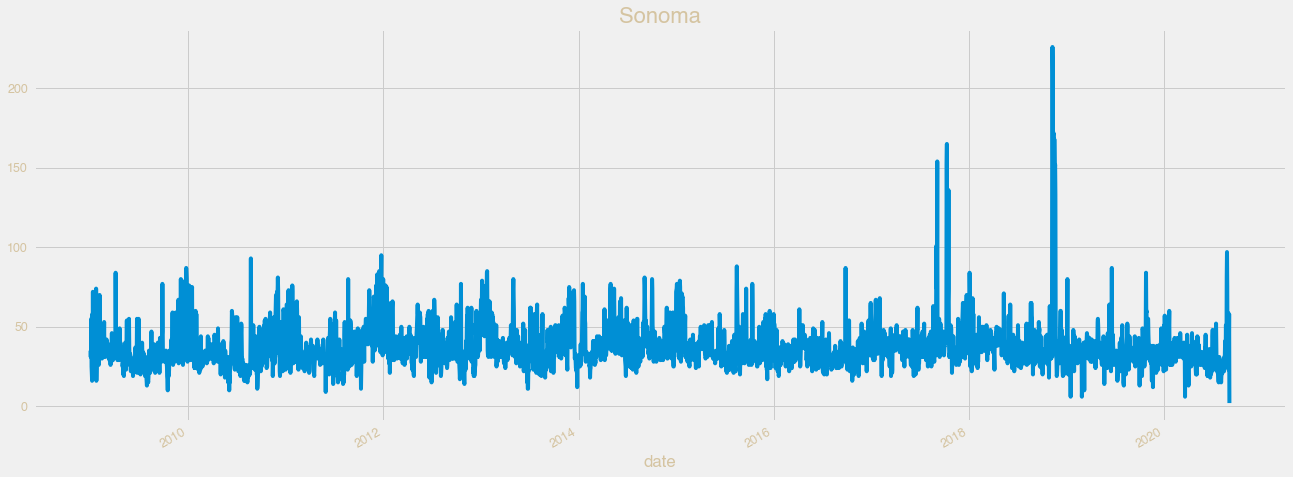

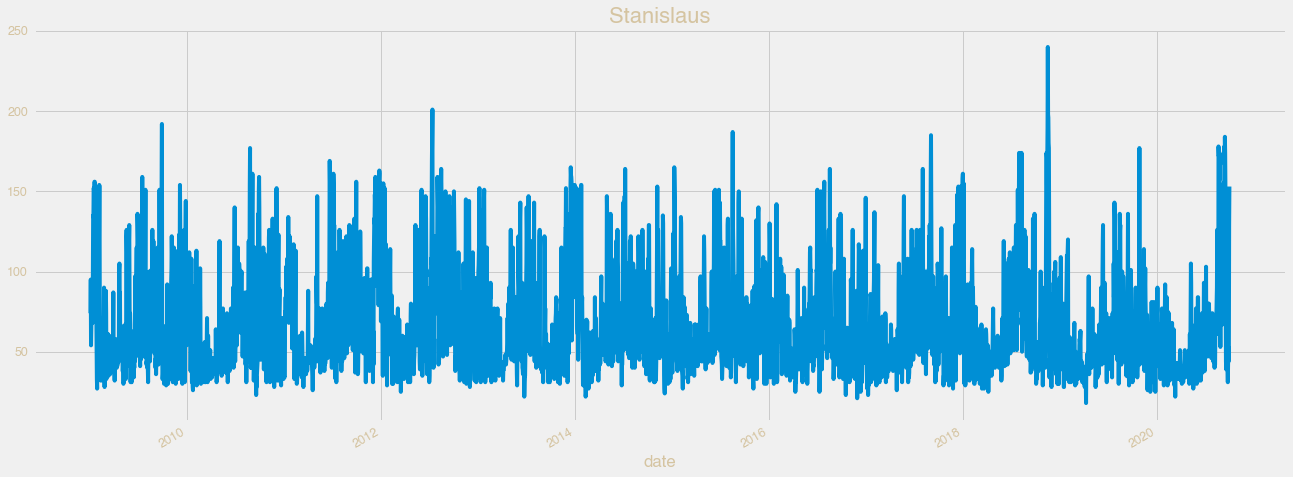

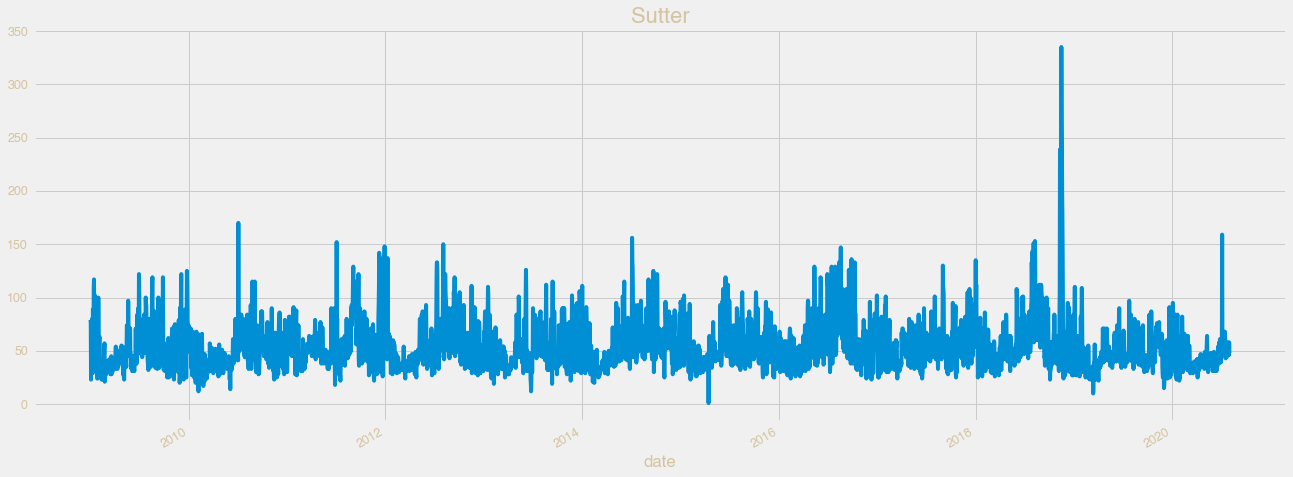

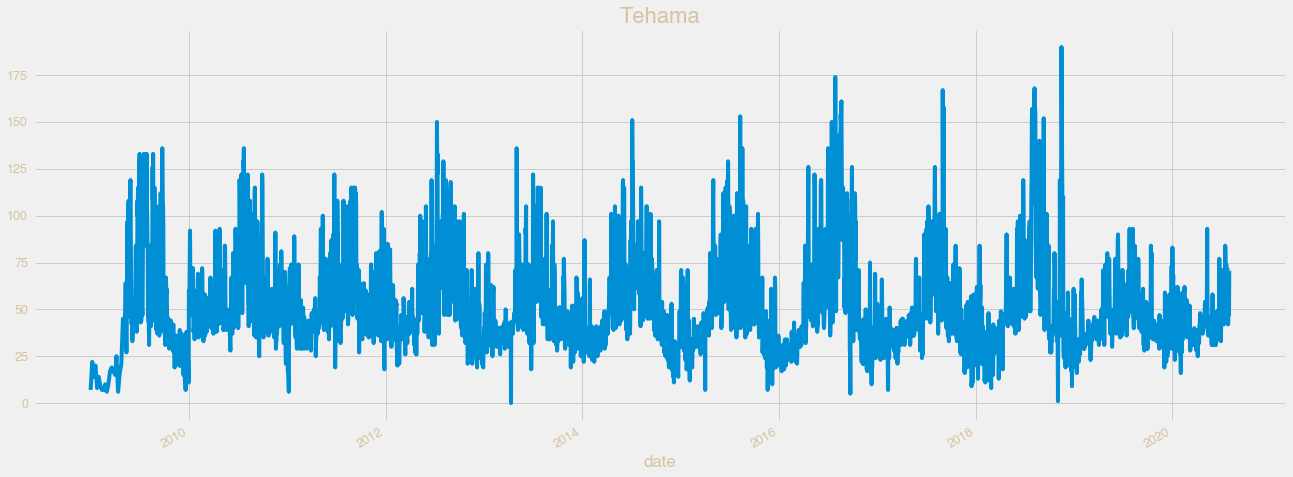

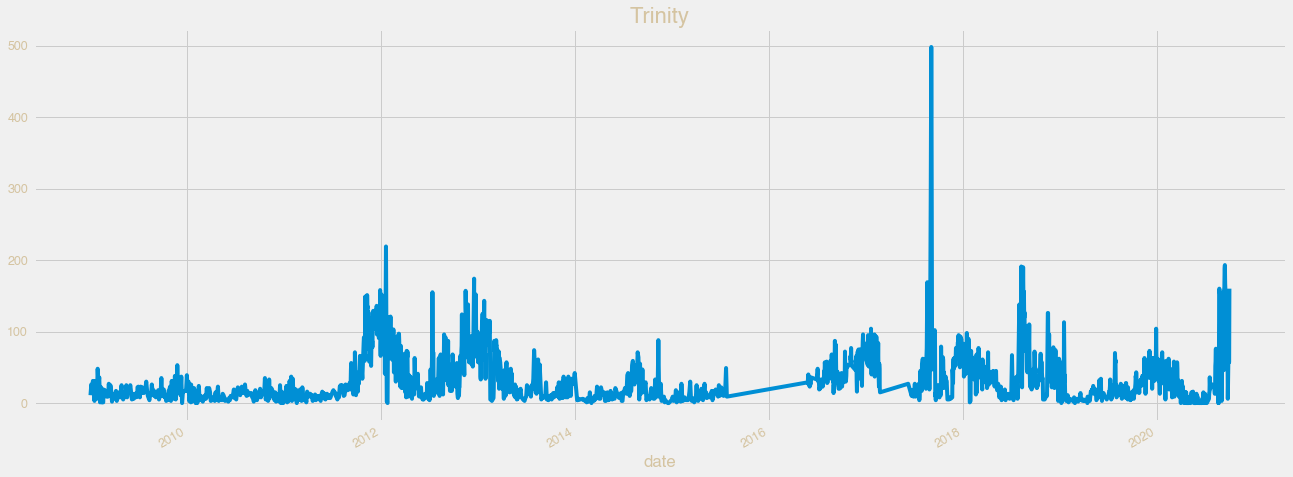

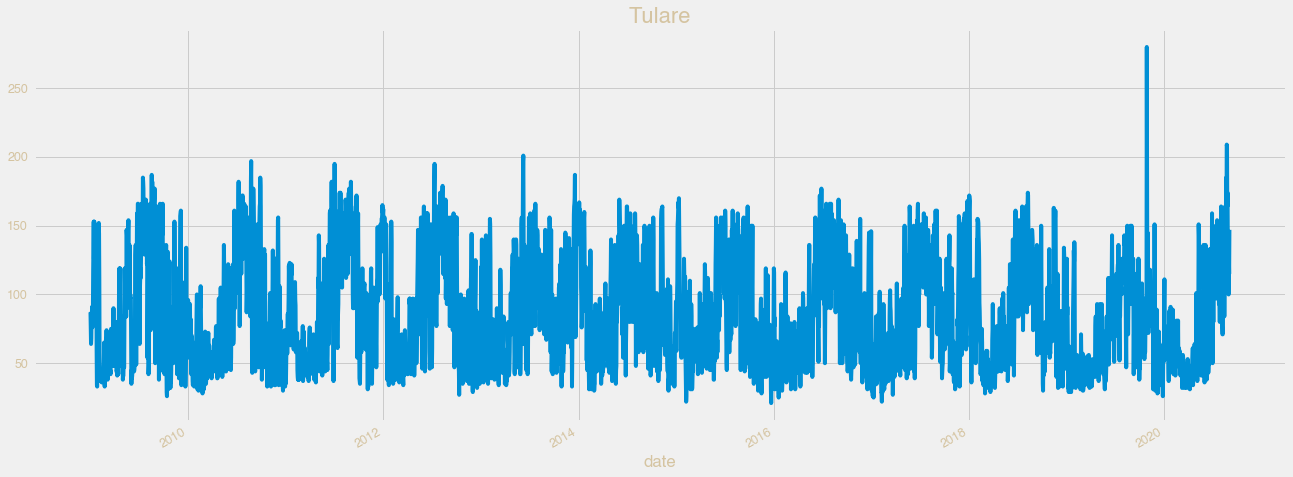

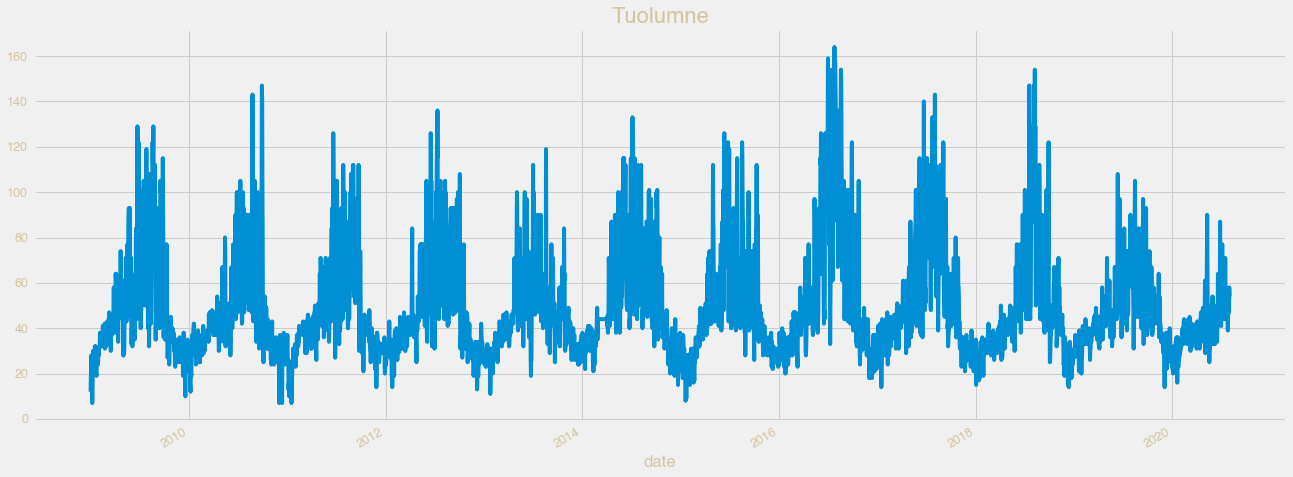

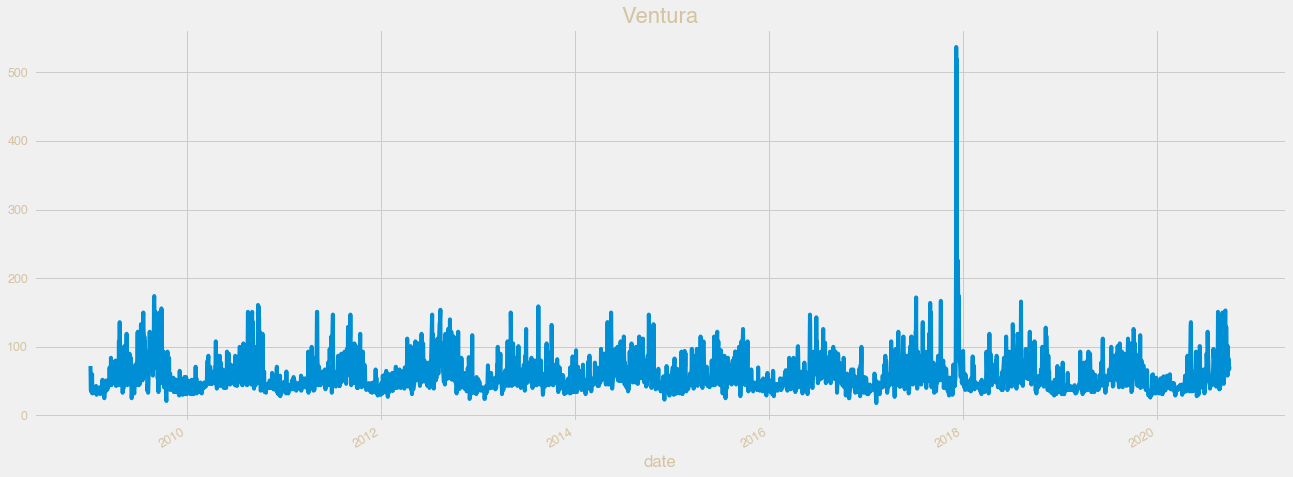

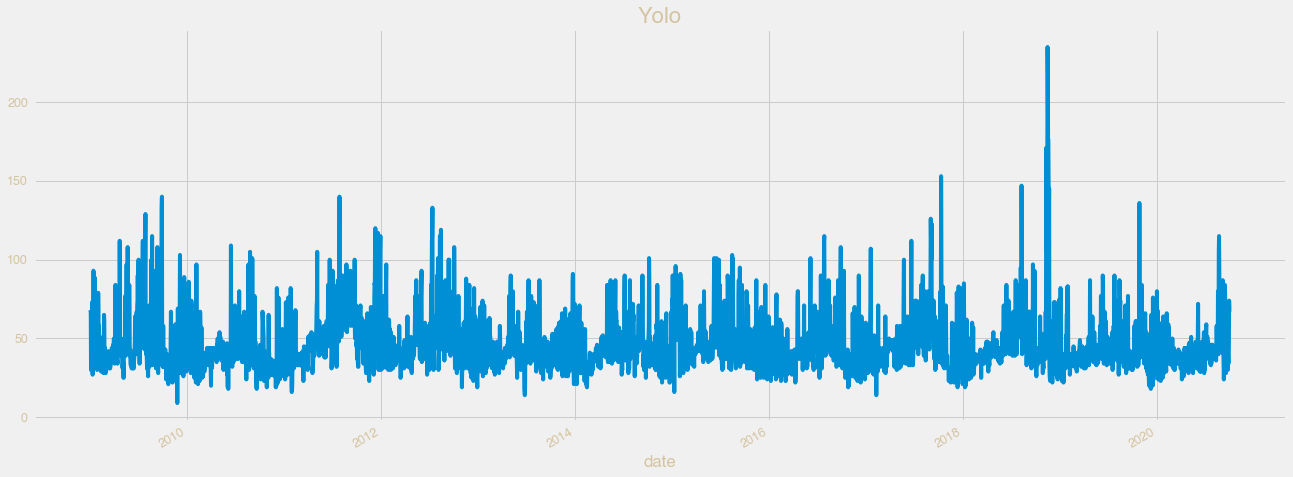

In [25]:
for i in df.county_name.unique().tolist():
    mask = df[df['county_name'] == i]
    plt.figure(figsize=(20,8))
    mask['aqi'].plot()
    plt.title(f'{i}', fontsize=22);

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(16,9))
plot_acf(sb_df['aqi'], ax=ax, lags=365);

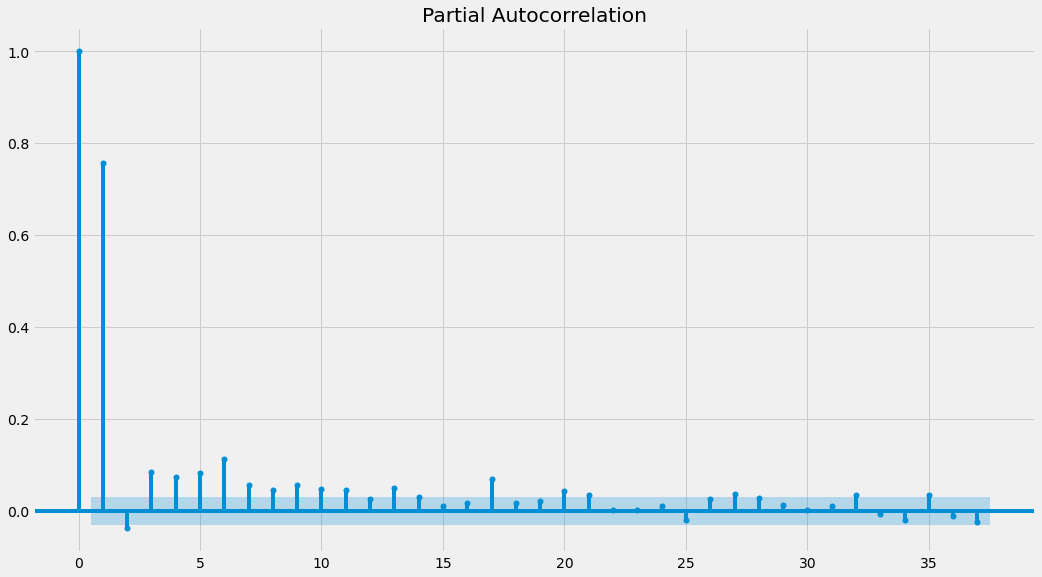

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(16,9))
plot_pacf(sb_df['aqi'], ax=ax);

<Figure size 1152x648 with 0 Axes>

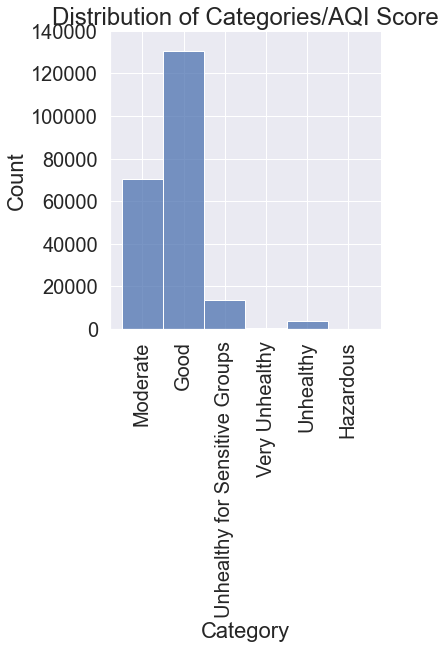

In [37]:
# Distribution of AQI to better understand range of scores
# changing to distribution of category bc aqi and category have some symmetry and will make EDA easier to interpret
plt.figure(figsize=(16,9))
ax = sns.displot(data=df, x='category')
plt.title('Distribution of Categories/AQI Score', fontsize=24)
plt.xlabel("Category", fontsize=22)
ax.set_xticklabels(rotation=90, fontsize=20)
ax.set_yticklabels(fontsize=20)
plt.ylabel("Count", fontsize=22);

In [45]:
df.category.value_counts(normalize=True).to_frame(name='%')

%
Good                            0.596359
Moderate                        0.321509
Unhealthy for Sensitive Groups  0.062598
Unhealthy                       0.017146
Very Unhealthy                  0.001386
Hazardous                       0.001002

Based on the above, over 90% of our data will fall in the good to moderate range (AQI score between 0-100). Our model will need to be preset to a certain AQI level and send an alert if it forecasts that AQI will cross above that level. Customers can change the threshold level to their choosing: customers in the sensitive groups category may consider the threshold at 100 while others may set theirs at 150 (unhealthy).

In [46]:
# AQI score grouped by category
df.groupby('category')['aqi'].describe()

count         mean          std    min  \
category                                                                    
Good                            130327.0    36.327116     9.260671    0.0   
Hazardous                          219.0  1148.694064  1551.128149  301.0   
Moderate                         70262.0    68.248612    13.787755   51.0   
Unhealthy                         3747.0   165.601548    13.051135  151.0   
Unhealthy for Sensitive Groups   13680.0   119.781067    14.223764  101.0   
Very Unhealthy                     303.0   223.376238    27.215908  201.0   

                                  25%    50%     75%      max  
category                                                       
Good                             31.0   38.0    43.0     50.0  
Hazardous                       411.0  636.0  1298.5  14043.0  
Moderate                         57.0   64.0    77.0    100.0  
Unhealthy                       155.0  161.0   174.0    200.0  
Unhealthy for Sensitive Groups  108.0  117.0   129.0    150.0  
Very Unhealthy                  204.0  210.0   233.5    300.0

Based on the below:
- Good = aqi between 0-50
- Moderate = aqi between 51-100
- Unhealthy for Sensitive Groups = 101-150
- Unhealthy = aqi between 151-200
- Very Unhealthy = aqi between 201-300
- Hazardous = aqi 300 or above

<ipython-input-47-46cdf985d0ae>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


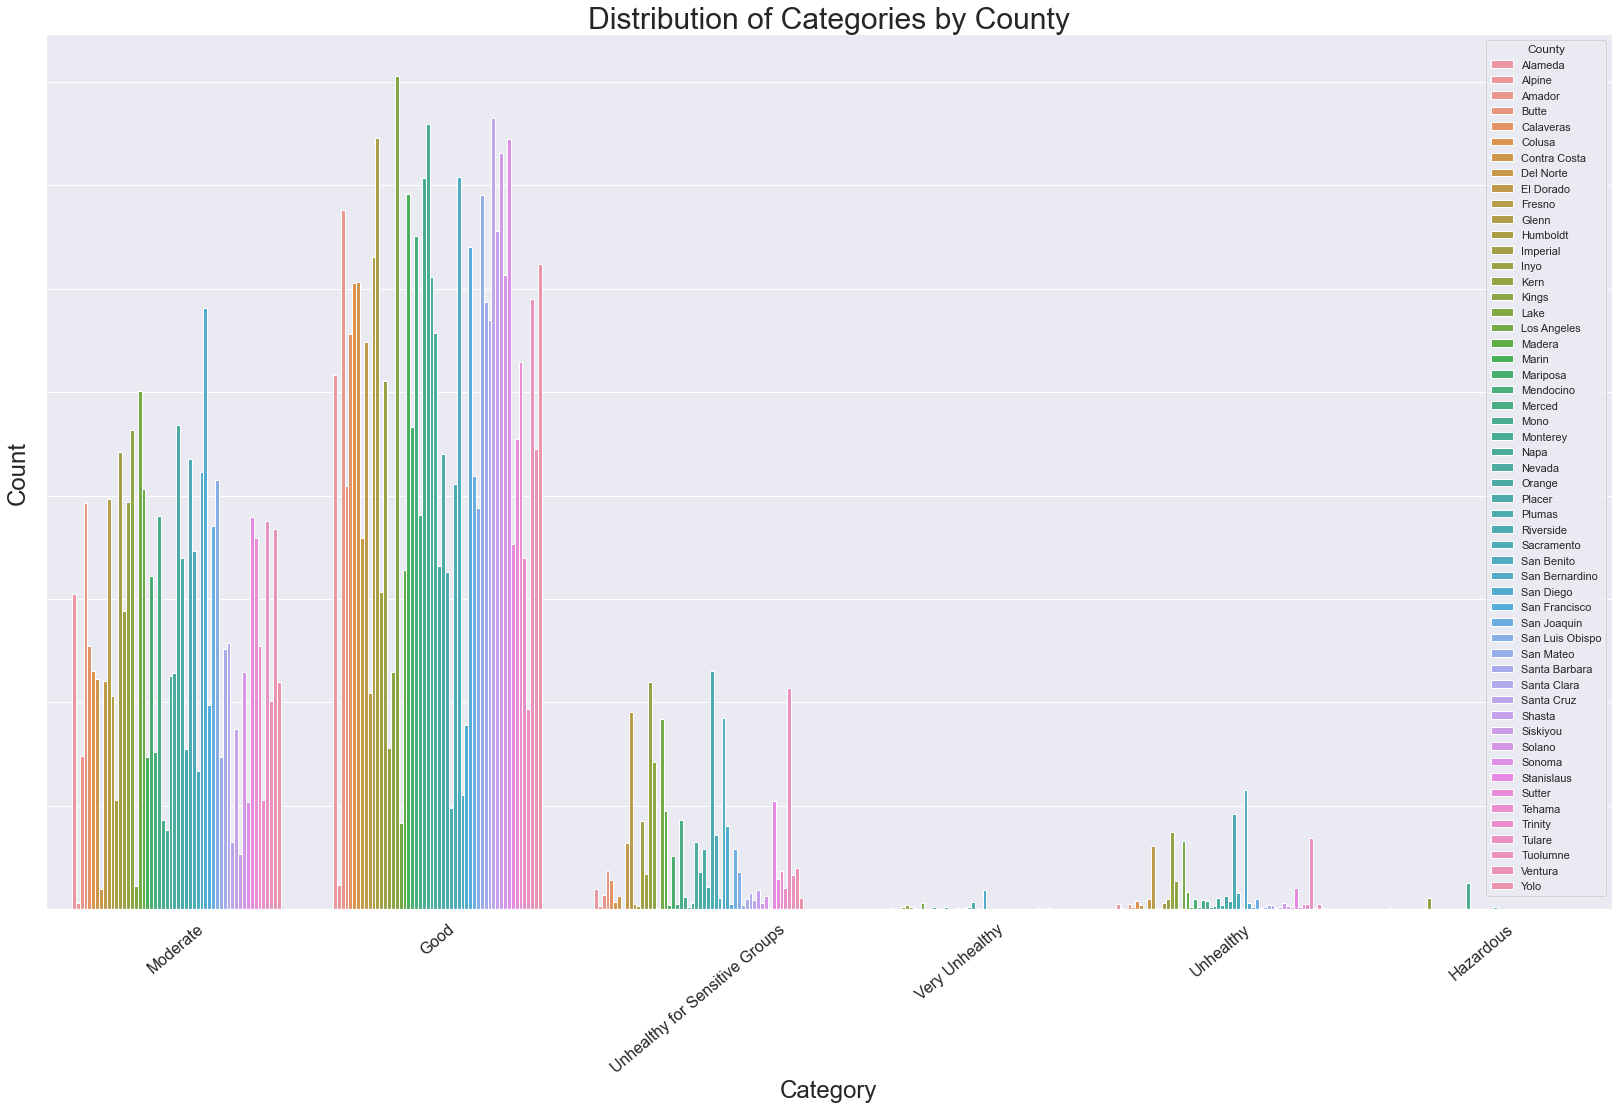

In [47]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x="category", hue="county_name", data=df)
plt.title('Distribution of Categories by County', fontsize=30)
plt.xlabel("Category", fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
plt.ylabel("Count", fontsize=24)
plt.legend(title='County', loc='upper right');

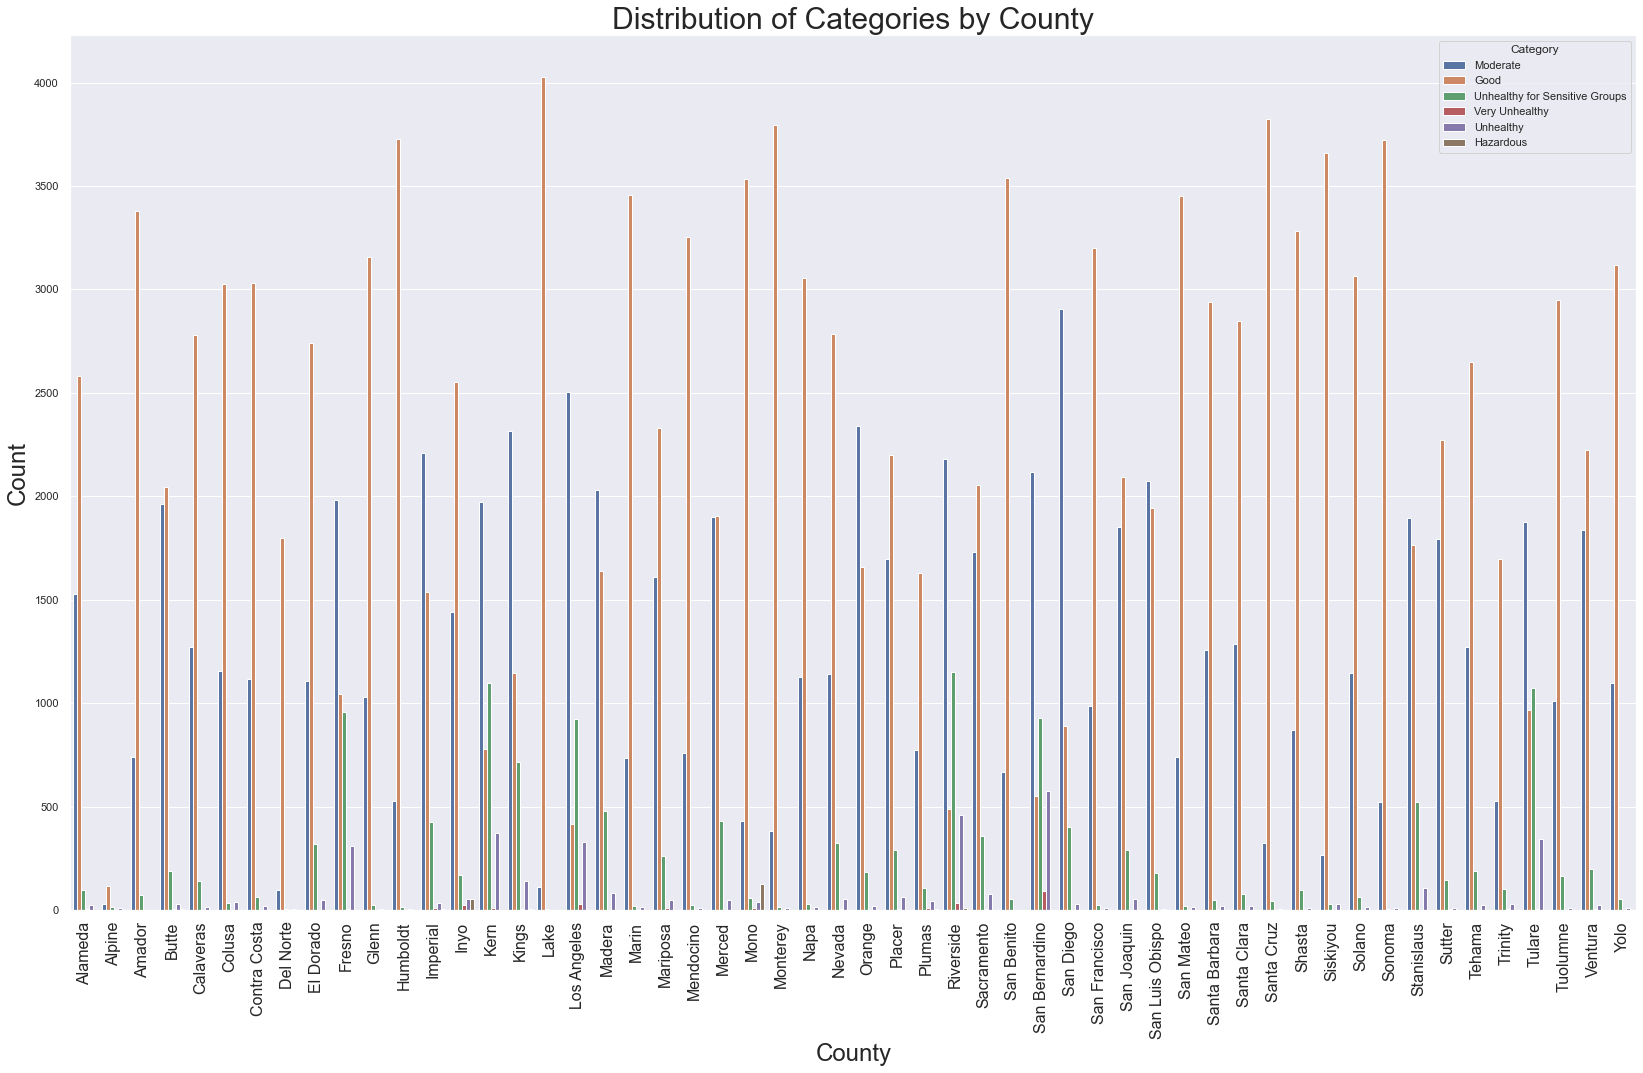

In [48]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x="county_name", hue="category", data=df)
plt.title('Distribution of Categories by County', fontsize=30)
plt.xlabel("County", fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
plt.ylabel("Count", fontsize=24)
plt.legend(title='Category', loc='upper right');

While the first graph is very pretty, due to the high number of counties it makes interpreting this graph difficult. The second graph is slightly easier to interpret as we can better judge which counties have more Very Unhealthy/Unhealthy/Hazardous counts.

In [55]:
df = pd.read_csv('./Datasets/cleaned_df.csv')

In [56]:
df['date'] = pd.to_datetime(df['date'])
#Creating a copy of date column to set as index. 
#The purpose of makeing a copy of this is for EDA exploratory analysis.
df['date_index'] = df['date']
df['date_index'] = pd.to_datetime(df['date_index'])
df.set_index('date_index', inplace=True)
df.sort_index(inplace=True)

# AQI Yearly Trend in California


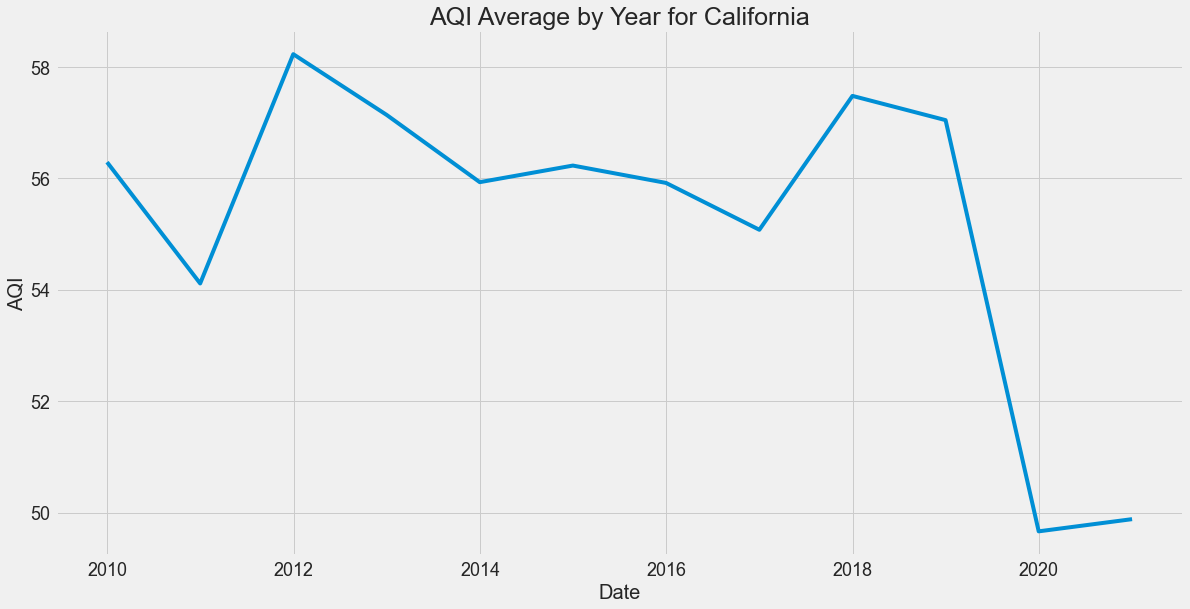

In [57]:
#Plot Style
plt.style.use('fivethirtyeight')
#plot size
plt.figure(figsize=(18,9))

#resampling by year to see any overall trends
plt.plot(df.resample('Y')['aqi'].mean());

#title
plt.title("AQI Average by Year for California", fontsize=25);

# Generate title and labels.
plt.xlabel('Date', fontsize=20);
plt.ylabel('AQI', fontsize=20);

# Enlarge tick marks.
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);


### AQI Trend in California

The graph above is showing the average AQI by year across county in California. There appears to be a long-term decreasing trend in AQI in California. The graph shows average AQI peaking in 2012 and a shap decline in 2020. As the line ends its starting to increasing going into 2021.


Based on research in 2012 California had a series of 7,950 wildfires that burned across the state. The fires burned a total of 869,599 acres (3,519.14 km2), including the massive Rush Fire, which was the tenth-largest wildfire recorded in California in modern times. [Source](https://en.wikipedia.org/wiki/2012_California_wildfires).

In 2020 were the graph displays a sharp decline in AQI could be a reflection of the impact the global pandemic, known as COVID 19, had on the environment. Many people began working from and therefore less transportation pollutions were being released. Although outside research tells us that 5 of the largest state fires occured in 2020 and we see AQI overall drop. This leads us to question if fires have a large impact on AQI or if AQI is less likely to be impacted by wildfires. 

---



<a id="2"></a>

# Monthly Aggregated Average California AQI 

In [58]:
df_california = df.resample('M')['aqi'].mean()

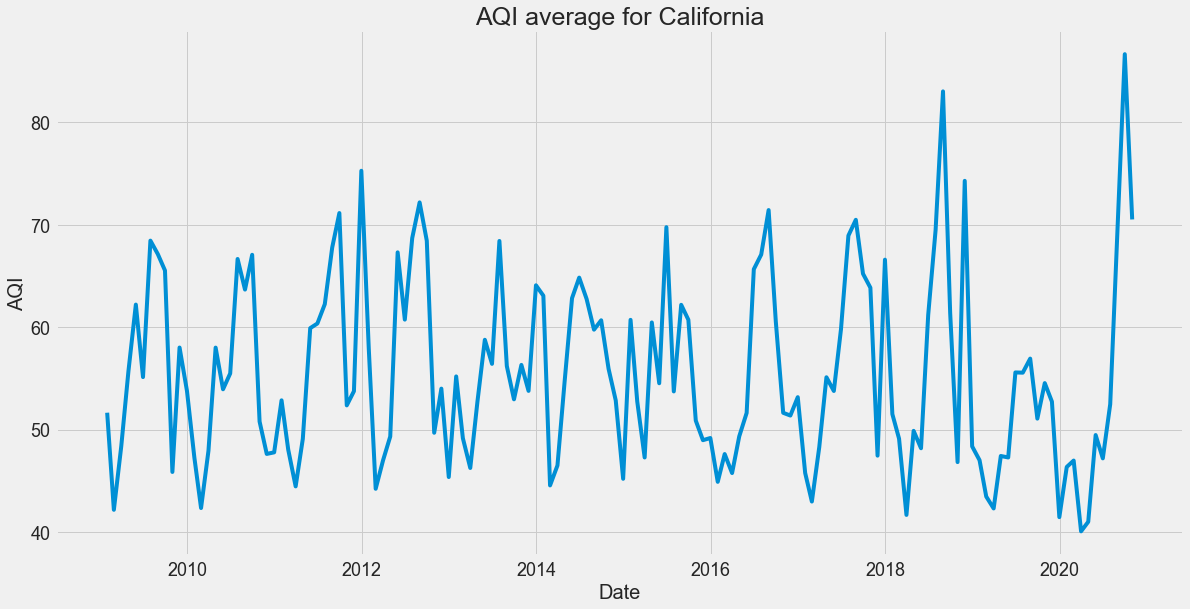

In [59]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,9))

plt.plot(df_california);
plt.title("AQI average for California", fontsize=25);

# Generate title and labels.
plt.xlabel('Date', fontsize=20);
plt.ylabel('AQI', fontsize=20);

# Enlarge tick marks.
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);



### Monthly Aggregated AQI across California from 2009 to 2021

In the graph above shows the average AQI aggregated by month across California counties from 2009 to 2021. Contasting against the previous yearly aggregated data, this monthly aggragation shows an overall increasing trend in AQI from 2009 to 2021. In 2009 AQI is hovering right above 50 and in 2021 the trend increases to just about 71. 

---

<a id="3"></a>

# 2019 AQI Trend

In [60]:
df_2019 = df.loc['2019']
df_2019 = df_2019.resample('M')['aqi'].mean()
df_2019

date_index
2019-01-31    47.006277
2019-02-28    43.456627
2019-03-31    42.293492
2019-04-30    47.419189
2019-05-31    47.275371
2019-06-30    55.579961
2019-07-31    55.558267
2019-08-31    56.932276
2019-09-30    51.069987
2019-10-31    54.539506
2019-11-30    52.726296
2019-12-31    41.445394
Freq: M, Name: aqi, dtype: float64

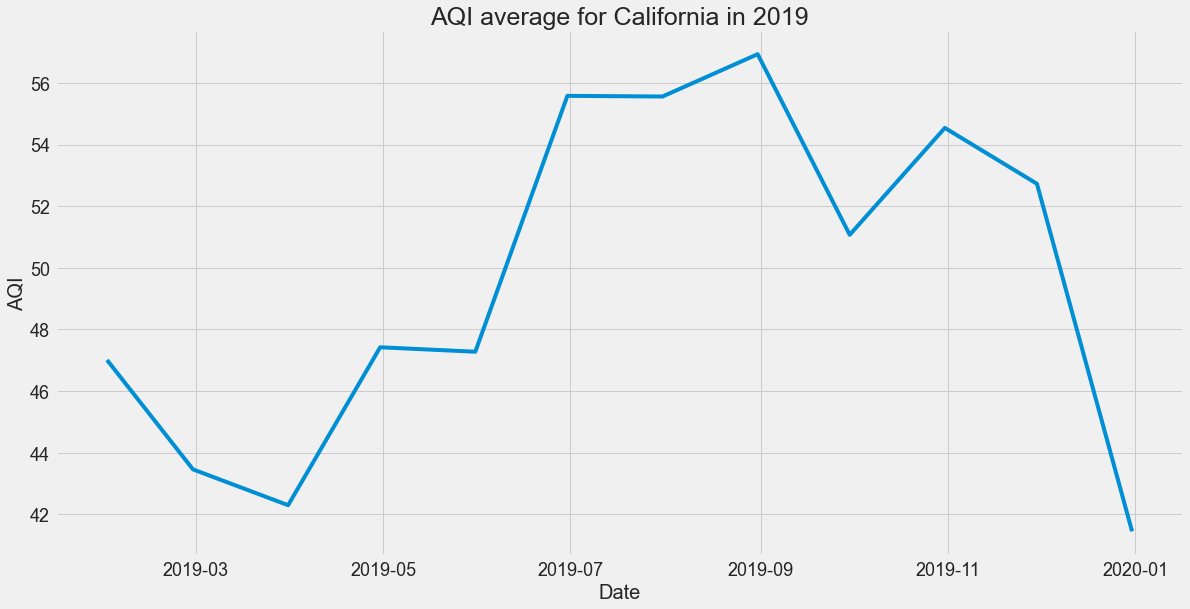

In [61]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,9))

plt.plot(df_2019);
plt.title("AQI average for California in 2019", fontsize=25);

# Generate title and labels.
plt.xlabel('Date', fontsize=20);
plt.ylabel('AQI', fontsize=20);

# Enlarge tick marks.
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);


<a id="6"></a>


# 2020 AQI by County

In [62]:
df_2020 = df.loc['2020']
df_2020.groupby('county_name')['aqi']

In [63]:
df_2020 = df_2020.groupby('county_name')['aqi'].mean()

In [65]:
import folium as folium

In [66]:
#source: https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
# Read in our map:
my_USA_map = './Datasets/california_counties.json'

In [77]:
map = folium.Map(location=[36, -119], zoom_start=6)

In [78]:
map.choropleth(geo_data=my_USA_map, data=df_2020,
               columns=['county_name', 'aqi'],
               key_on='properties.name',
               fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
               legend_name='aqi',
               scope=['California'])
map

In [84]:
import plotly.figure_factory as ff

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'Florida']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Florida'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Population by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo
